In [1]:
!gdown --id 18DY3N9IPT1zzz8cESZ1gRQgw6JNHmmII

Downloading...
From: https://drive.google.com/uc?id=18DY3N9IPT1zzz8cESZ1gRQgw6JNHmmII
To: /content/article_csvs.zip
31.8MB [00:00, 76.6MB/s]


In [2]:
!unzip article_csvs.zip

Archive:  article_csvs.zip
  inflating: asy_preds_quiet.csv     
  inflating: preds_quiet.csv         
  inflating: preds_storms.csv        
  inflating: preds_storms_asy.csv    


In [3]:
import pandas as pd
import os
import numpy as np
from datetime import datetime
from sklearn.metrics import mean_squared_error as msem
from sklearn.metrics import r2_score as r2m
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
SAVE_FIGS = True

if (SAVE_FIGS):
    !mkdir plots_out

df_quiet_sym = pd.read_csv('./preds_quiet.csv')
df_quiet_sym.set_index('date', inplace=True)
df_quiet_sym.index = pd.to_datetime(df_quiet_sym.index)

df_quiet_asy = pd.read_csv('./asy_preds_quiet.csv')
df_quiet_asy.set_index('date', inplace=True)
df_quiet_asy.index = pd.to_datetime(df_quiet_asy.index)

df_storms_sym = pd.read_csv('./preds_storms.csv')
df_storms_sym.set_index('date', inplace=True)
df_storms_sym.index = pd.to_datetime(df_storms_sym.index)

df_storms_asy = pd.read_csv('./preds_storms_asy.csv')
df_storms_asy.set_index('date', inplace=True)
df_storms_asy.index = pd.to_datetime(df_storms_asy.index)

In [5]:
start_year = 2013
end_year = 2020

resumen_df = pd.DataFrame(
    columns=["Year"]
)

for i_year in range(end_year - start_year + 1):
    yy = i_year + start_year

    if i_year == 0:
        start_date = pd.to_datetime(
            str(start_year + i_year) + "01010320", format="%Y%m%d%H%M", errors="ignore"
        )    
    else: 
        start_date = pd.to_datetime(
            str(start_year + i_year) + "0101", format="%Y%m%d", errors="ignore"
        )
    end_date = pd.to_datetime(
        str(start_year + i_year) + "12312355", format="%Y%m%d%H%M", errors="ignore"
    )

    
   

    outsym = df_quiet_sym[start_date : end_date].copy()
    outasy = df_quiet_asy[start_date : end_date].copy()

    print(
        f"Testing year {yy}, minimum SYM-H: {outsym['og_SYM-H_t0'].min()}, maximum ASY-H: {outasy['og_ASY-H_t0'].max()}"
    )    
    

Testing year 2013, minimum SYM-H: -134.0, maximum ASY-H: 171.0
Testing year 2014, minimum SYM-H: -125.0, maximum ASY-H: 152.0
Testing year 2015, minimum SYM-H: -233.0, maximum ASY-H: 348.0
Testing year 2016, minimum SYM-H: -116.99999999999996, maximum ASY-H: 171.0
Testing year 2017, minimum SYM-H: -144.0, maximum ASY-H: 230.0
Testing year 2018, minimum SYM-H: -205.0, maximum ASY-H: 197.0
Testing year 2019, minimum SYM-H: -77.0, maximum ASY-H: 146.0
Testing year 2020, minimum SYM-H: -68.0, maximum ASY-H: 143.0


In [6]:
TRAINING_STORMS_DATES_START_SYM = [
    "19980214",
    "19980802",
    "19980919",
    "19990216",
    "19991015",
    "20000709",
    "20000806",
    "20000915",
    "20001101",
    "20010314",
    "20010406",
    "20011017",
    "20011031",
    "20020517",
    "20031115",
    "20040720",
    "20050510",
    "20060409",
    "20061209",
    "20120301",
]
TRAINING_STORMS_DATES_END_SYM = [
    "199802222355",
    "199808082355",
    "199809292355",
    "199902242355",
    "199910252355",
    "200007192355",
    "200008162355",
    "200009252355",
    "200011152355",
    "200103242355",
    "200104162355",
    "200110222355",
    "200111102355",
    "200205272355",
    "200311252355",
    "200407302355",
    "200505202355",
    "200604192355",
    "200612192355",
    "201203112355",
]

VALIDATION_STORMS_DATES_START_SYM = [
    "19980428",
    "19990919",
    "20031025",
    "20150618",
    "20170901",
]
VALIDATION_STORMS_DATES_END_SYM = [
    "199805082355",
    "199909262355",
    "200311032355",
    "201506282355",
    "201709112355",
]

TESTING_STORMS_DATES_START_SYM = [
    "19980622",
    "19981102",
    "19990109",
    "19990413",
    "20000116",
    "20000402",
    "20000519",
    "20010326",
    "20030526",
    "20030708",
    "20040118",
    "20041104",
    "20120910",
    "20130528",
    "20130626",
    "20150311",
    "20180822",
]
TESTING_STORMS_DATES_END_SYM = [
    "199806302355",
    "199811122355",
    "199901182355",
    "199904192355",
    "200001262355",
    "200004122355",
    "200005282355",
    "200104042355",
    "200306062355",
    "200307182355",
    "200401272355",
    "200411142355",
    "201210052355",
    "201306042355",
    "201307042355",
    "201503212355",
    "201809032355",
]

TRAINING_STORMS_DATES_START_ASY = [
    "19980214",
    "19980802",
    "19980919",
    "19990216",
    "19991015",
    "20000709",
    "20000806",
    "20000915",
    "20001101",
    "20010314",
    "20010406",
    "20011017",
    "20011031",
    "20020517",
    "20031115",
    "20040720",
    "20050510",
    "20031025",
    "20061209",
    "20120301",
]
TRAINING_STORMS_DATES_END_ASY = [
    "199802222355",
    "199808082355",
    "199809292355",
    "199902242355",
    "199910252355",
    "200007192355",
    "200008162355",
    "200009252355",
    "200011152355",
    "200103242355",
    "200104162355",
    "200110222355",
    "200111102355",
    "200205272355",
    "200311252355",
    "200407302355",
    "200505202355",
    "200311032355",
    "200612192355",
    "201203112355",
]

VALIDATION_STORMS_DATES_START_ASY = [
    "19980428",
    "19990919",
    "20060409",
    "20150618",
    "20170901",
]
VALIDATION_STORMS_DATES_END_ASY = [
    "199805082355",
    "199909262355",
    "200604192355",
    "201506282355",
    "201709112355",
]

TESTING_STORMS_DATES_START_ASY = [
    "19980622",
    "19981102",
    "19990109",
    "19990413",
    "20000116",
    "20000402",
    "20000519",
    "20010326",
    "20030526",
    "20030708",
    "20040118",
    "20041104",
    "20120910",
    "20130528",
    "20130626",
    "20150311",
    "20180822",
]
TESTING_STORMS_DATES_END_ASY = [
    "199806302355",
    "199811122355",
    "199901182355",
    "199904192355",
    "200001262355",
    "200004122355",
    "200005282355",
    "200104042355",
    "200306062355",
    "200307182355",
    "200401272355",
    "200411142355",
    "201210052355",
    "201306042355",
    "201307042355",
    "201503212355",
    "201809032355",
]

In [7]:
print('Testing metrics SYM-H')

Testing metrics SYM-H


In [8]:
df_storms_sym

og_SYM-H_t+60  ...  og_SYM-H_t0
date                                ...             
1998-02-13 15:20:00        -18.000  ...          -18
1998-02-13 15:25:00        -19.000  ...          -18
1998-02-13 15:30:00        -20.000  ...          -18
1998-02-13 15:35:00        -21.000  ...          -18
1998-02-13 15:40:00        -21.000  ...          -18
...                            ...  ...          ...
2018-09-04 22:35:00        -22.000  ...           -9
2018-09-04 22:40:00        -23.000  ...           -9
2018-09-04 22:45:00        -23.000  ...          -11
2018-09-04 22:50:00        -23.000  ...          -12
2018-09-04 22:55:00        -24.000  ...          -14

[151949 rows x 5 columns]

In [9]:
df_storms_sym_60 = df_storms_sym[['og_SYM-H_t+60','pred_SYM-H_t+60']].copy()
for col in df_storms_sym_60:
    df_storms_sym_60[col] = df_storms_sym_60[col].shift(+12)

df_storms_sym_120 = df_storms_sym[['og_SYM-H_t+120','pred_SYM-H_t+120']].copy()
for col in df_storms_sym_120:
    df_storms_sym_120[col] = df_storms_sym_120[col].shift(+24)


df_storms_asy_60 = df_storms_asy[['og_ASY-H_t+60','pred_ASY-H_t+60']].copy()
for col in df_storms_asy_60:
    df_storms_asy_60[col] = df_storms_asy_60[col].shift(+12)

df_storms_asy_120 = df_storms_asy[['og_ASY-H_t+120','pred_ASY-H_t+120']].copy()
for col in df_storms_asy_120:
    df_storms_asy_120[col] = df_storms_asy_120[col].shift(+24)


df_quiet_sym_60 = df_quiet_sym[['og_SYM-H_t+60','pred_SYM-H_t+60']].copy()
for col in df_quiet_sym_60:
    df_quiet_sym_60[col] = df_quiet_sym_60[col].shift(+12)

df_quiet_sym_120 = df_quiet_sym[['og_SYM-H_t+120','pred_SYM-H_t+120']].copy()
for col in df_quiet_sym_120:
    df_quiet_sym_120[col] = df_quiet_sym_120[col].shift(+24)

df_quiet_asy_60 = df_quiet_asy[['og_ASY-H_t+60','pred_ASY-H_t+60']].copy()
for col in df_quiet_asy_60:
    df_quiet_asy_60[col] = df_quiet_asy_60[col].shift(+12)

df_quiet_asy_120 = df_quiet_asy[['og_ASY-H_t+120','pred_ASY-H_t+120']].copy()
for col in df_quiet_asy_120:
    df_quiet_asy_120[col] = df_quiet_asy_120[col].shift(+24)

In [10]:
df_storms_sym.head(20)

og_SYM-H_t+60  ...  og_SYM-H_t0
date                                ...             
1998-02-13 15:20:00        -18.000  ...          -18
1998-02-13 15:25:00        -19.000  ...          -18
1998-02-13 15:30:00        -20.000  ...          -18
1998-02-13 15:35:00        -21.000  ...          -18
1998-02-13 15:40:00        -21.000  ...          -18
1998-02-13 15:45:00        -20.000  ...          -18
1998-02-13 15:50:00        -20.000  ...          -18
1998-02-13 15:55:00        -20.000  ...          -17
1998-02-13 16:00:00        -20.000  ...          -18
1998-02-13 16:05:00        -21.000  ...          -18
1998-02-13 16:10:00        -21.000  ...          -18
1998-02-13 16:15:00        -21.000  ...          -18
1998-02-13 16:20:00        -20.000  ...          -18
1998-02-13 16:25:00        -21.000  ...          -19
1998-02-13 16:30:00        -21.000  ...          -20
1998-02-13 16:35:00        -21.000  ...          -21
1998-02-13 16:40:00        -21.000  ...          -21
1998-02-13 16:45:00        -21.000  ...          -20
1998-02-13 16:50:00        -21.000  ...          -20
1998-02-13 16:55:00        -21.000  ...          -20

[20 rows x 5 columns]

In [11]:
df_storms_sym_60

og_SYM-H_t+60  pred_SYM-H_t+60
date                                               
1998-02-13 15:20:00            nan              nan
1998-02-13 15:25:00            nan              nan
1998-02-13 15:30:00            nan              nan
1998-02-13 15:35:00            nan              nan
1998-02-13 15:40:00            nan              nan
...                            ...              ...
2018-09-04 22:35:00         -9.000           -9.119
2018-09-04 22:40:00         -9.000           -9.524
2018-09-04 22:45:00        -11.000          -10.270
2018-09-04 22:50:00        -12.000          -11.173
2018-09-04 22:55:00        -14.000          -11.602

[151949 rows x 2 columns]

In [12]:
df_storms_sym_120

og_SYM-H_t+120  pred_SYM-H_t+120
date                                                 
1998-02-13 15:20:00             nan               nan
1998-02-13 15:25:00             nan               nan
1998-02-13 15:30:00             nan               nan
1998-02-13 15:35:00             nan               nan
1998-02-13 15:40:00             nan               nan
...                             ...               ...
2018-09-04 22:35:00          -9.000            -8.035
2018-09-04 22:40:00          -9.000            -7.168
2018-09-04 22:45:00         -11.000            -6.980
2018-09-04 22:50:00         -12.000            -8.421
2018-09-04 22:55:00         -14.000            -9.409

[151949 rows x 2 columns]

In [13]:
SYM_COLS_60 = ['og_SYM-H_t+60', 'pred_SYM-H_t+60']
SYM_COLS_120 = ['og_SYM-H_t+120', 'pred_SYM-H_t+120	']

In [14]:
time_format_s = '%m/%d/%Y'
time_format_l = '%B %-d, %Y'
font_size_s = 13
font_size_l = 15
xt_rot = 35
plt.rcParams['axes.facecolor'] = '#fefeff'
plt.rcParams['figure.facecolor'] = 'white'

Test storm number 26, from 1998-06-22 00:00:00 until 1998-06-30 23:55:00
t+60


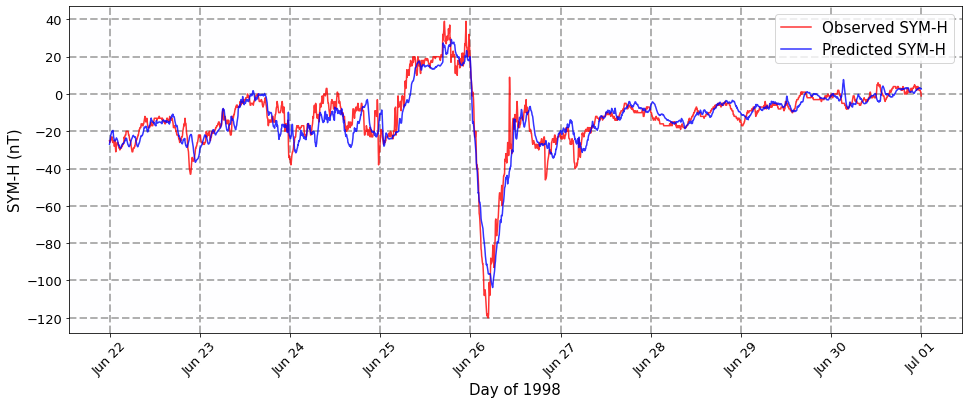

t+120


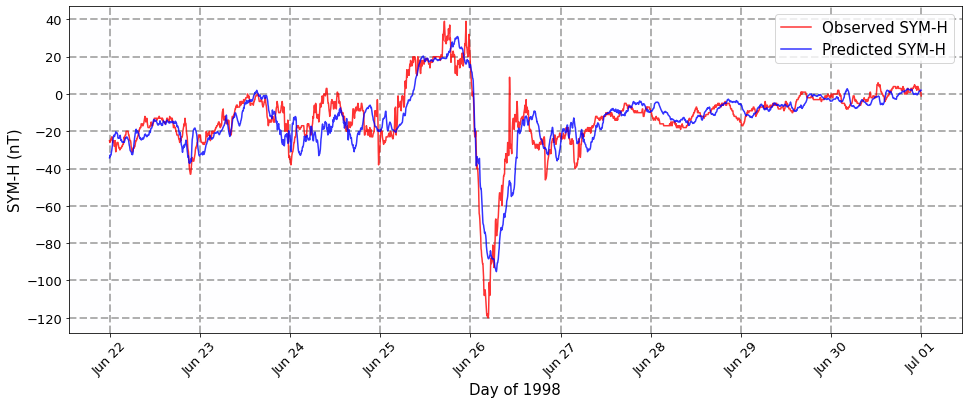

Test storm number 27, from 1998-11-02 00:00:00 until 1998-11-12 23:55:00
t+60


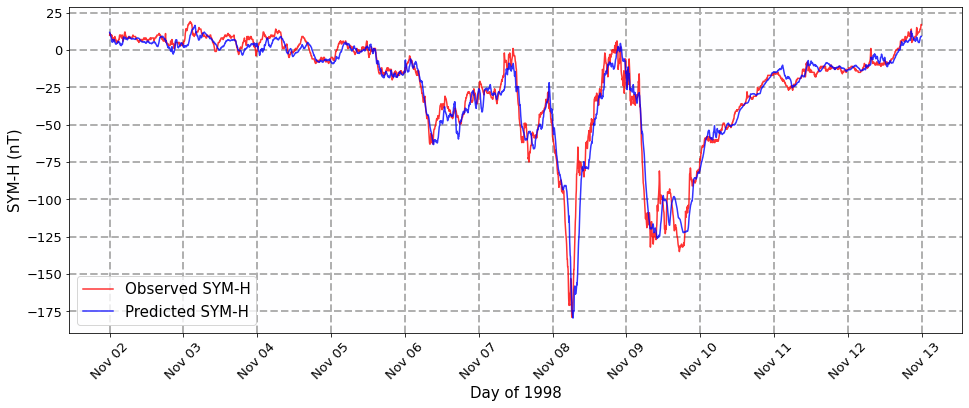

t+120


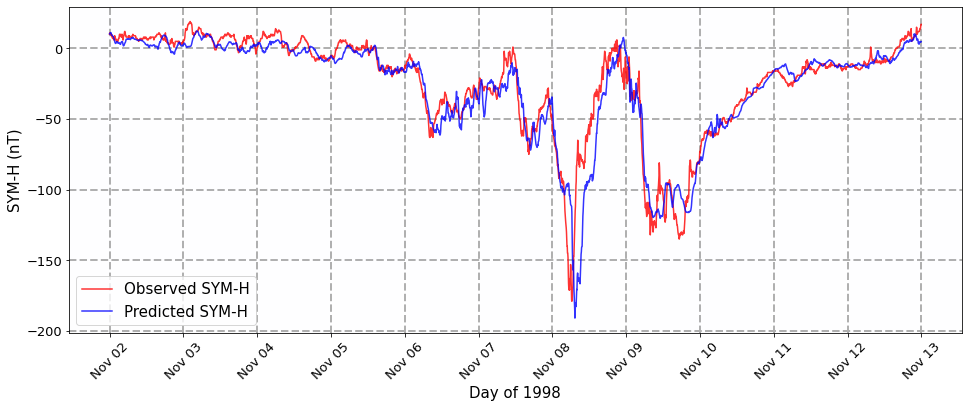

Test storm number 28, from 1999-01-09 00:00:00 until 1999-01-18 23:55:00
t+60


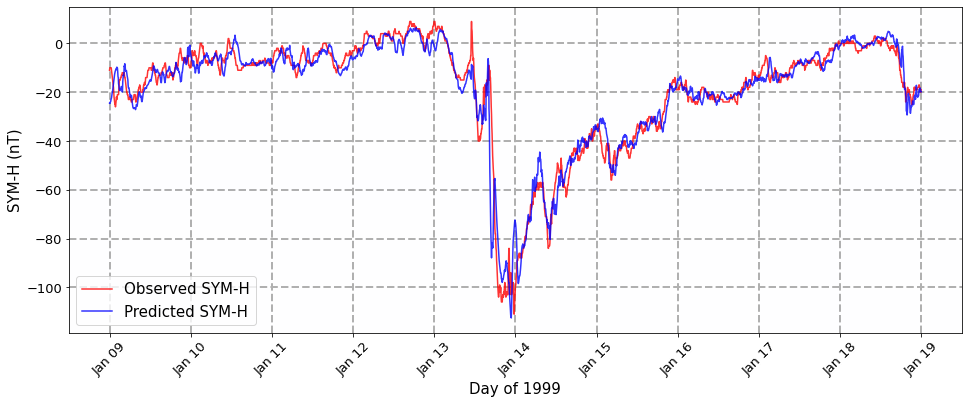

t+120


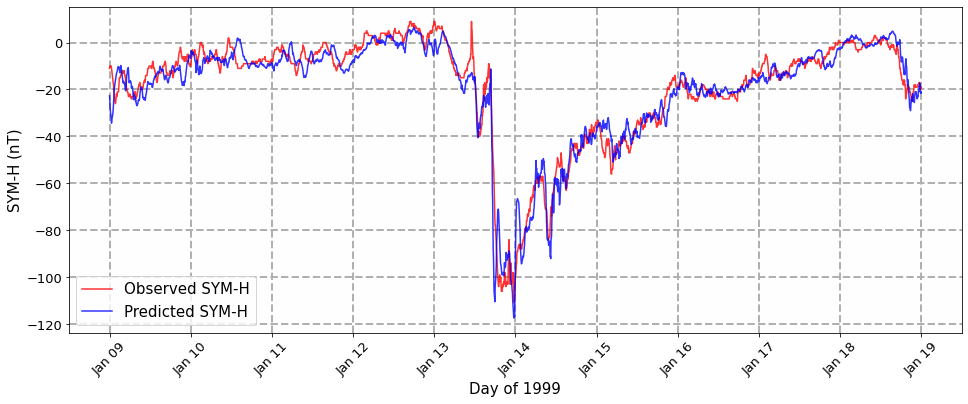

Test storm number 29, from 1999-04-13 00:00:00 until 1999-04-19 23:55:00
t+60


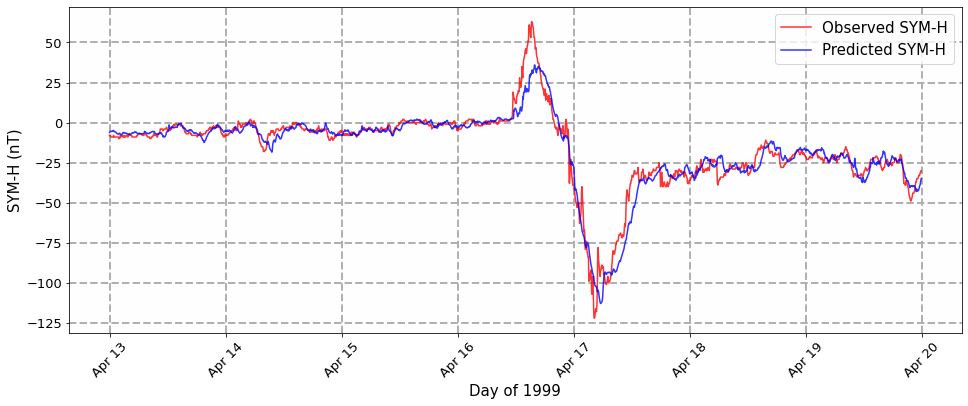

t+120


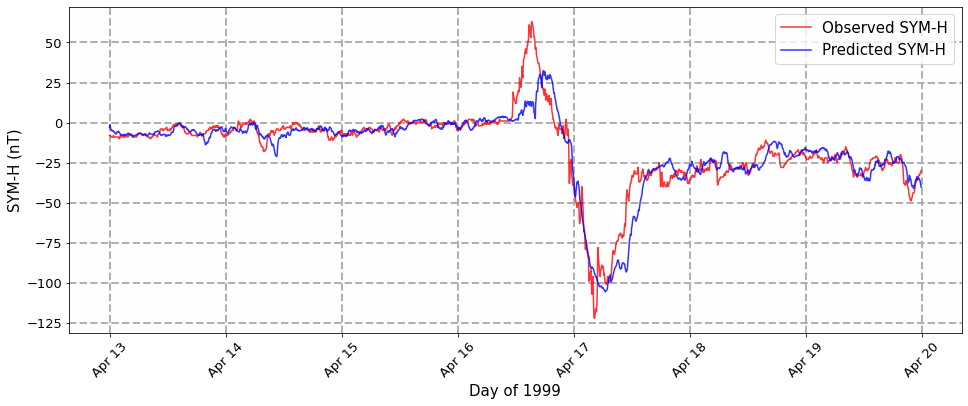

Test storm number 30, from 2000-01-16 00:00:00 until 2000-01-26 23:55:00
t+60


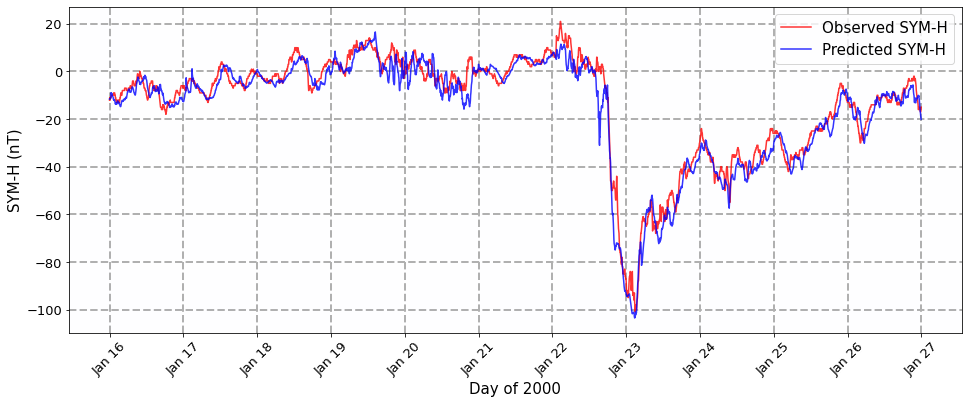

t+120


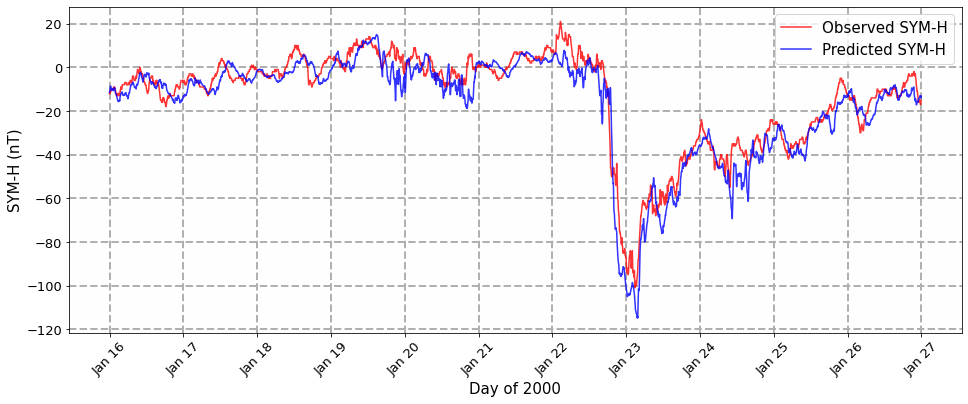

Test storm number 31, from 2000-04-02 00:00:00 until 2000-04-12 23:55:00
t+60


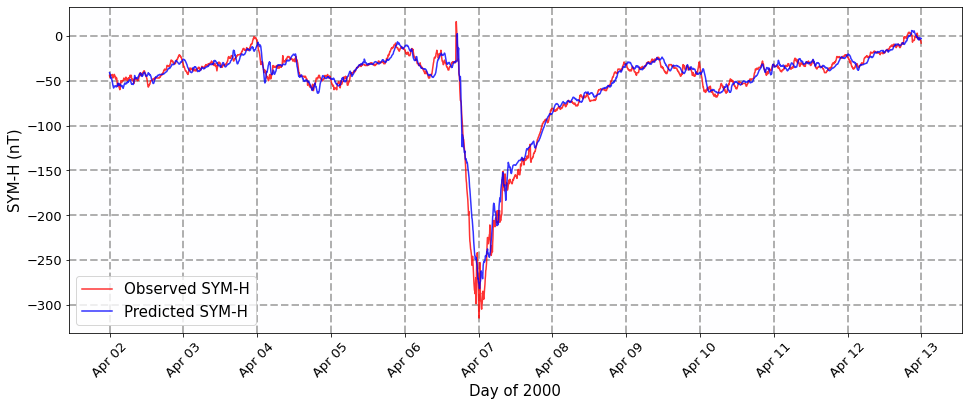

t+120


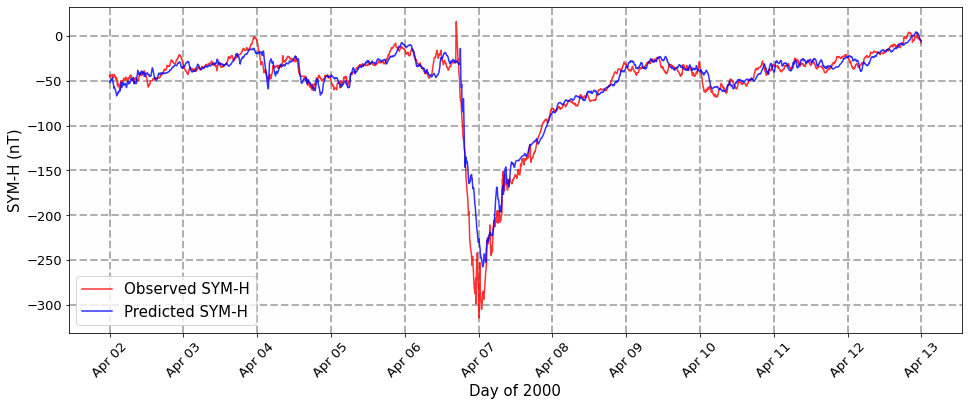

Test storm number 32, from 2000-05-19 00:00:00 until 2000-05-28 23:55:00
t+60


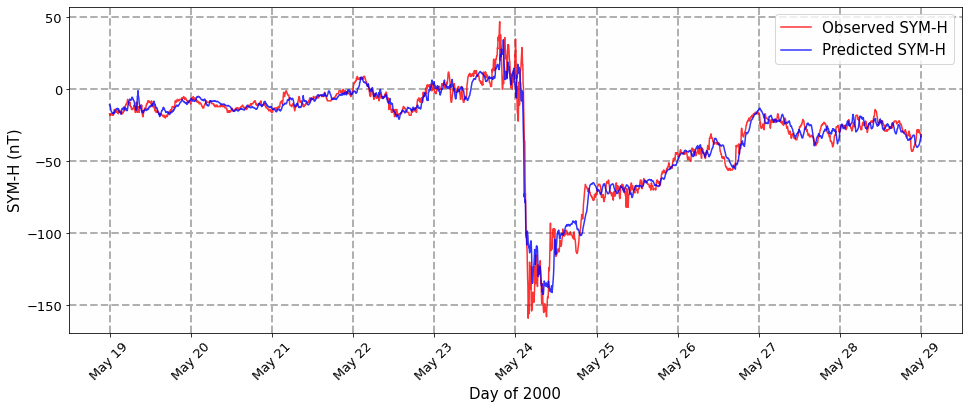

t+120


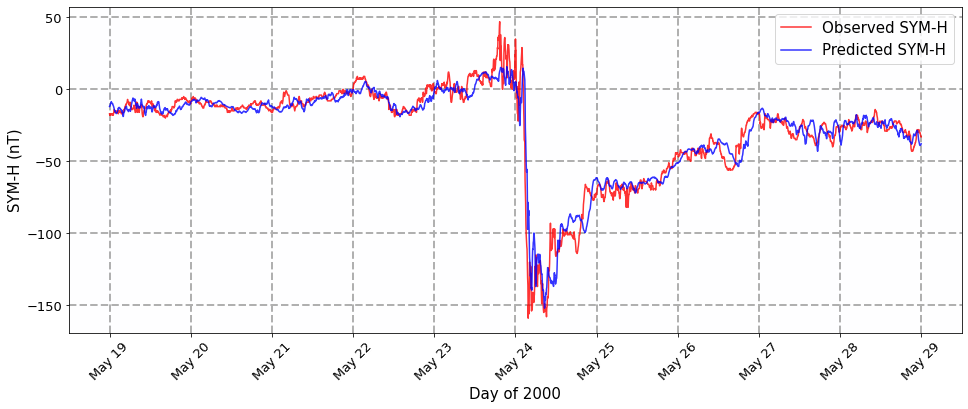

Test storm number 33, from 2001-03-26 00:00:00 until 2001-04-04 23:55:00
t+60


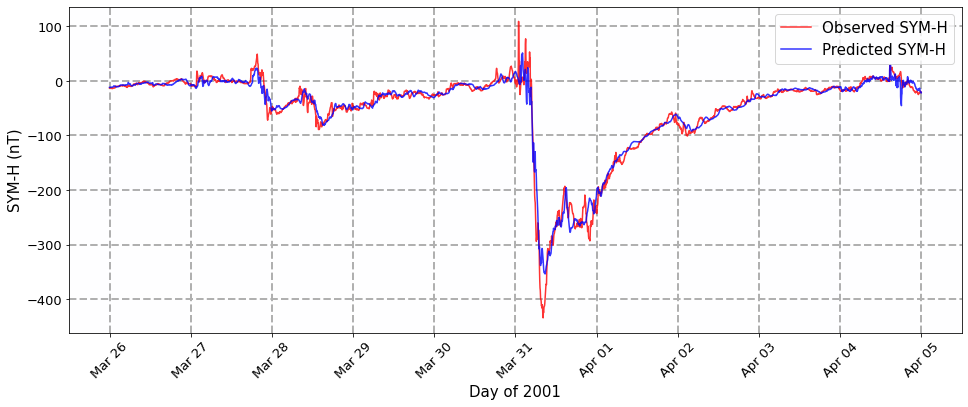

t+120


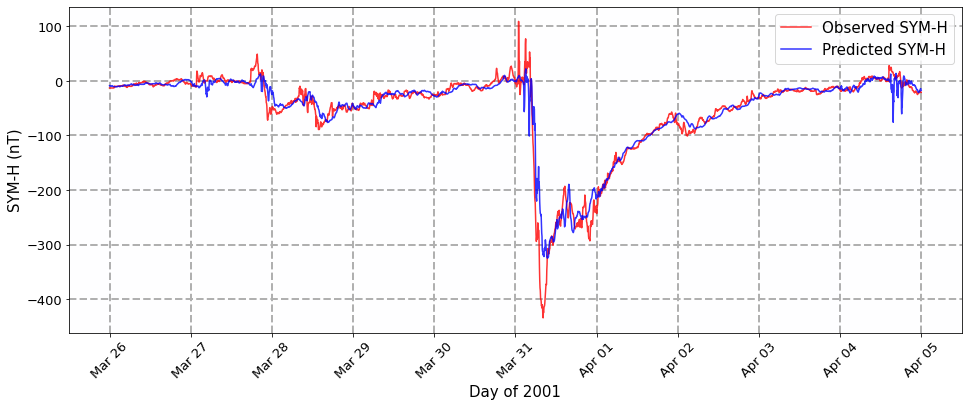

Test storm number 34, from 2003-05-26 00:00:00 until 2003-06-06 23:55:00
t+60


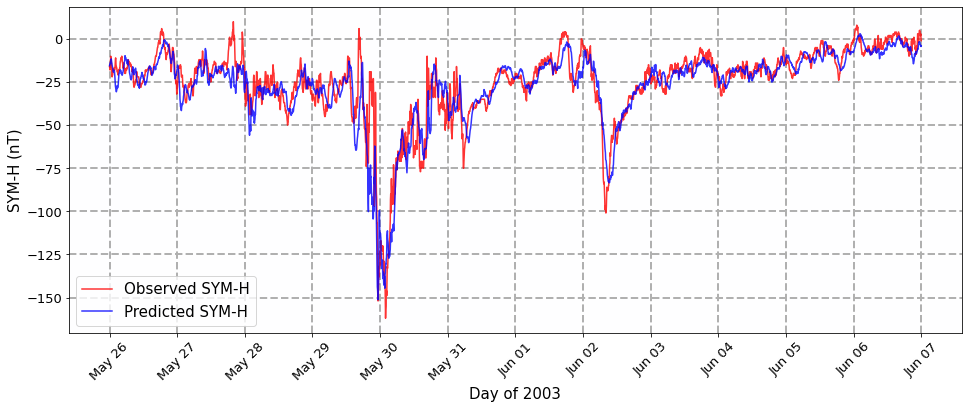

t+120


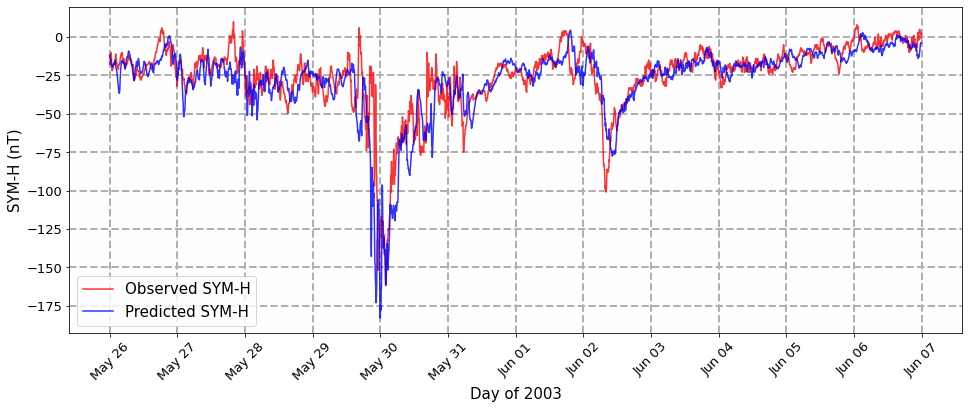

Test storm number 35, from 2003-07-08 00:00:00 until 2003-07-18 23:55:00
t+60


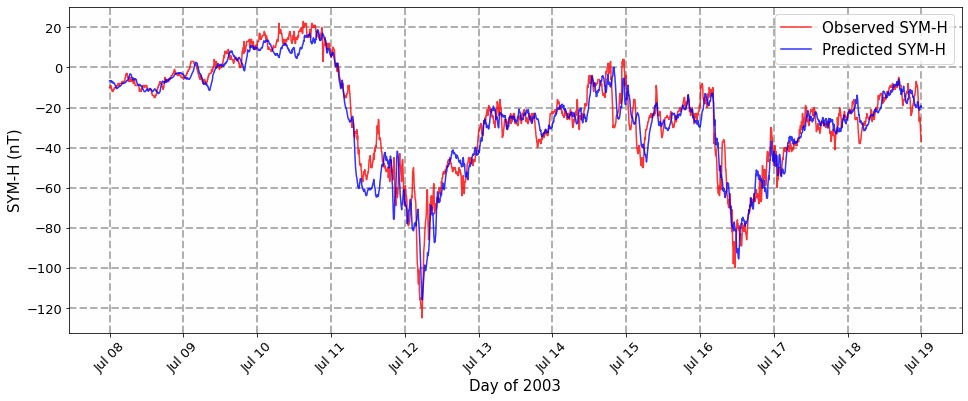

t+120


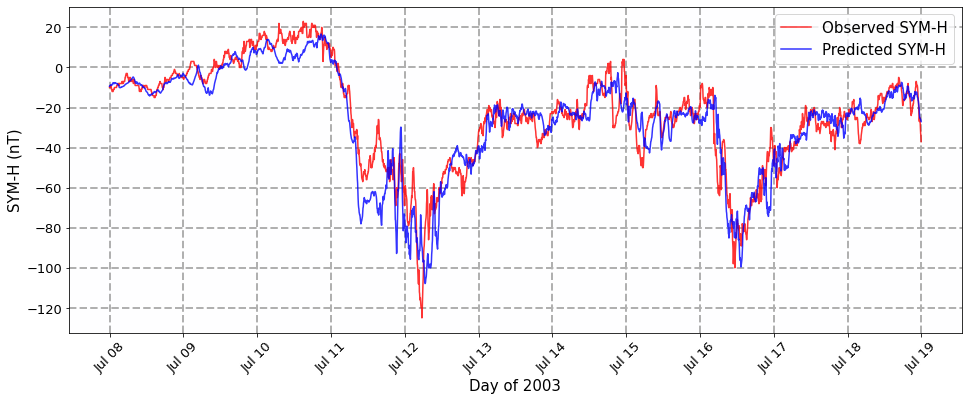

Test storm number 36, from 2004-01-18 00:00:00 until 2004-01-27 23:55:00
t+60


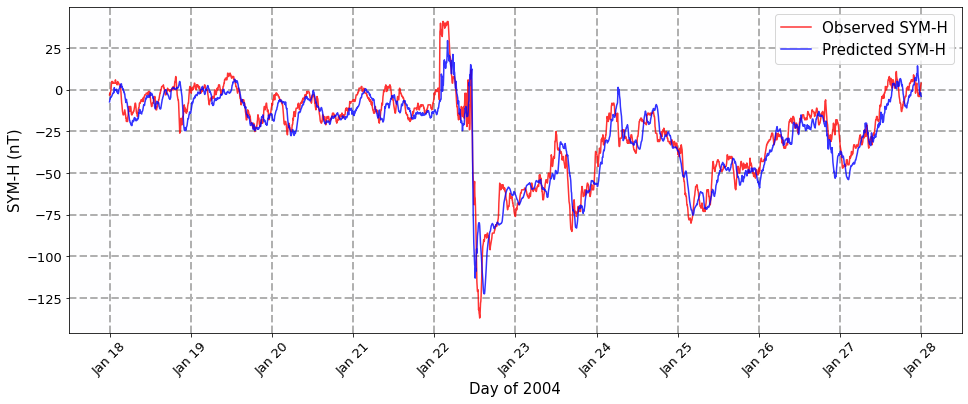

t+120


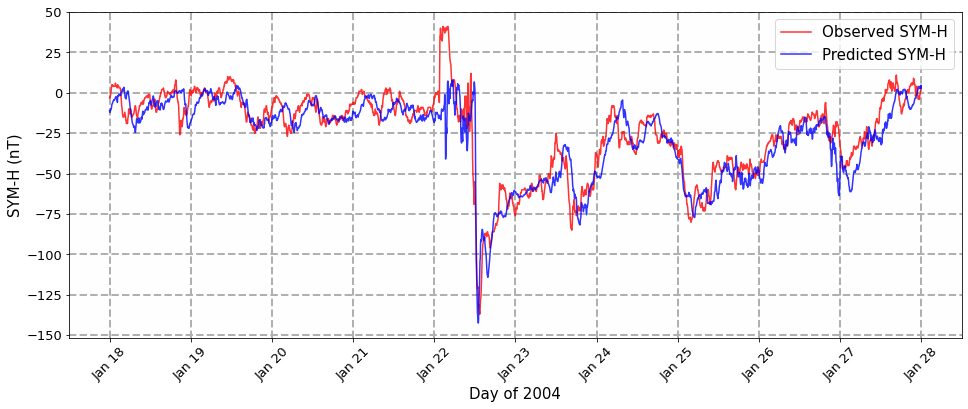

Test storm number 37, from 2004-11-04 00:00:00 until 2004-11-14 23:55:00
t+60


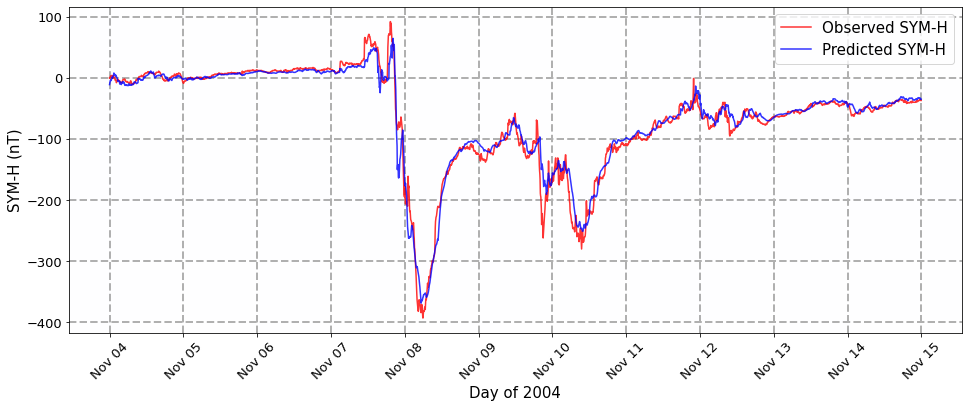

t+120


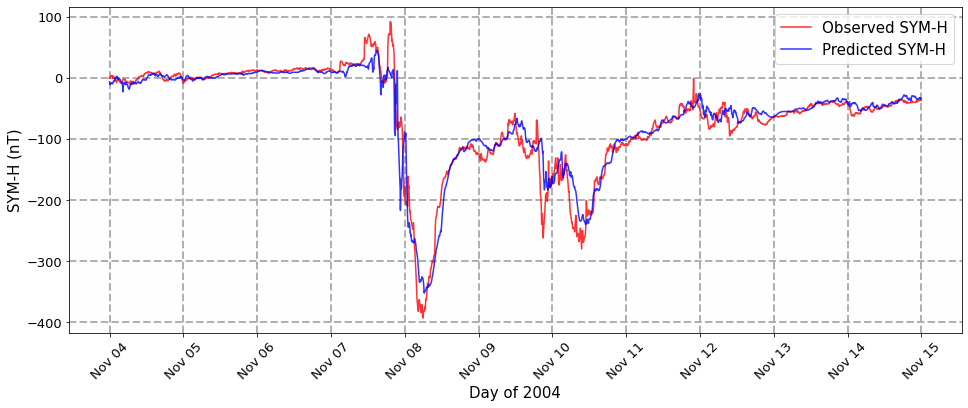

Test storm number 38, from 2012-09-10 00:00:00 until 2012-10-05 23:55:00
t+60


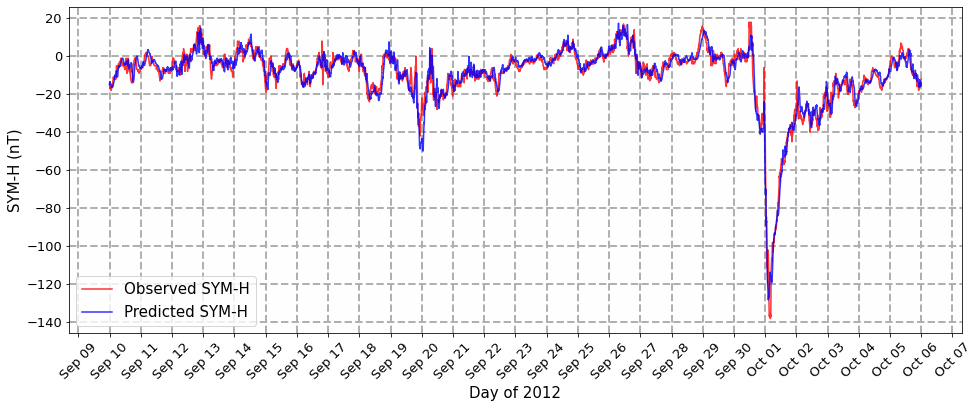

t+120


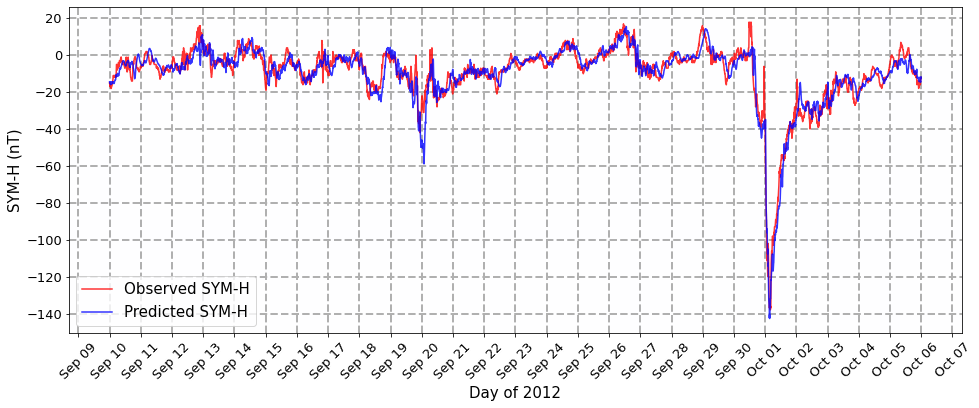

Test storm number 39, from 2013-05-28 00:00:00 until 2013-06-04 23:55:00
t+60


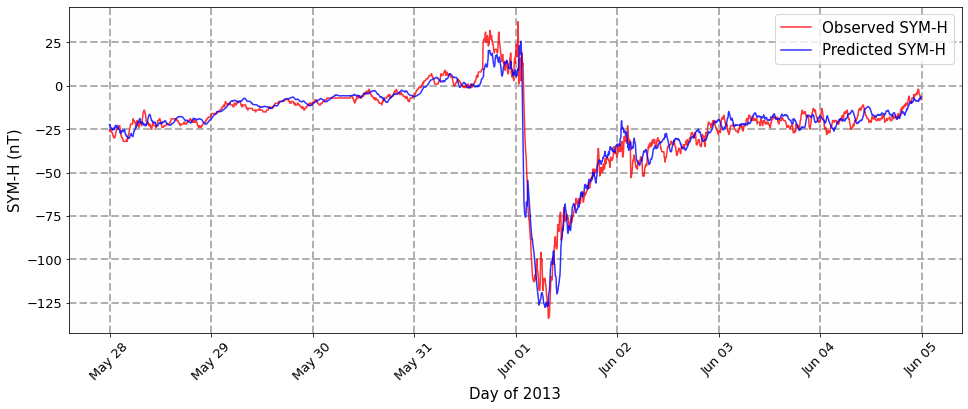

t+120


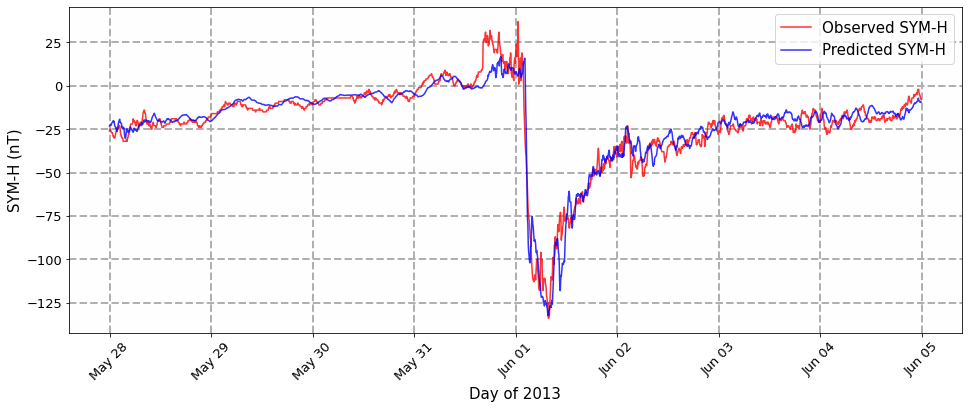

Test storm number 40, from 2013-06-26 00:00:00 until 2013-07-04 23:55:00
t+60


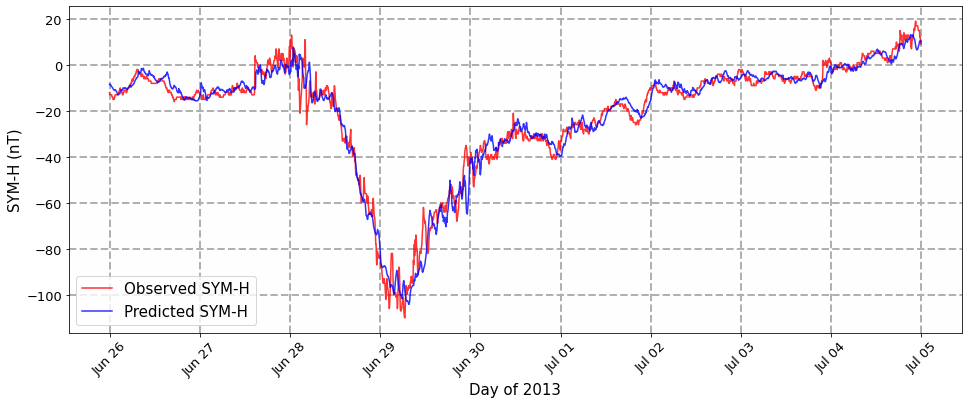

t+120


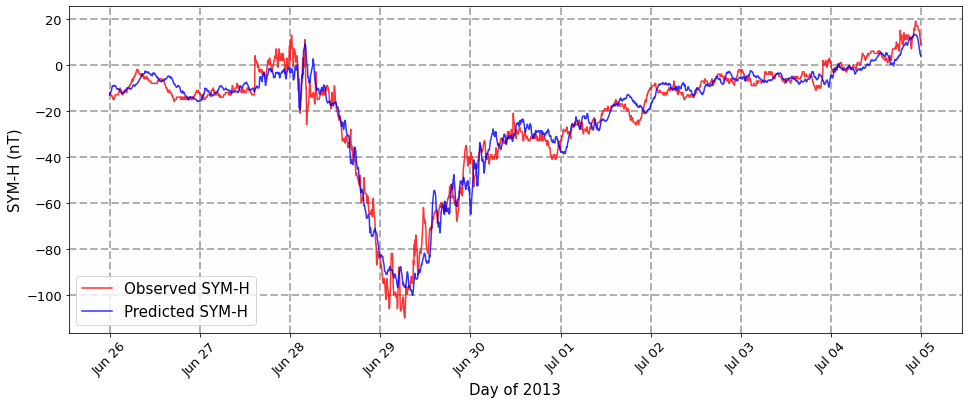

Test storm number 41, from 2015-03-11 00:00:00 until 2015-03-21 23:55:00
t+60


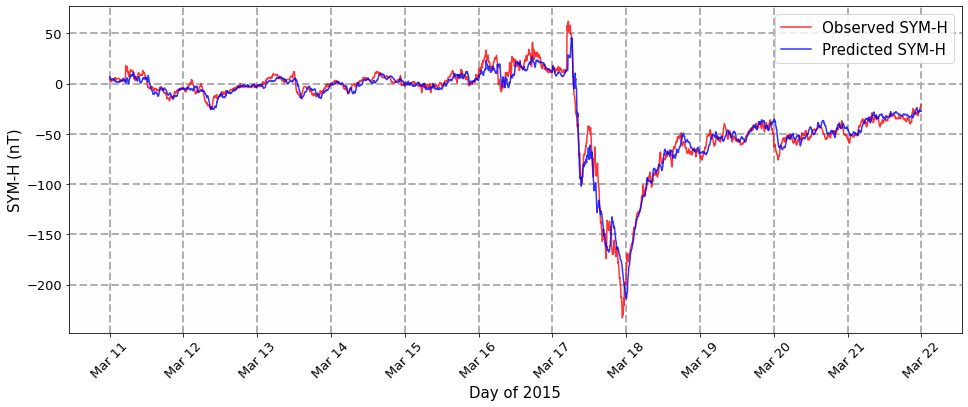

t+120


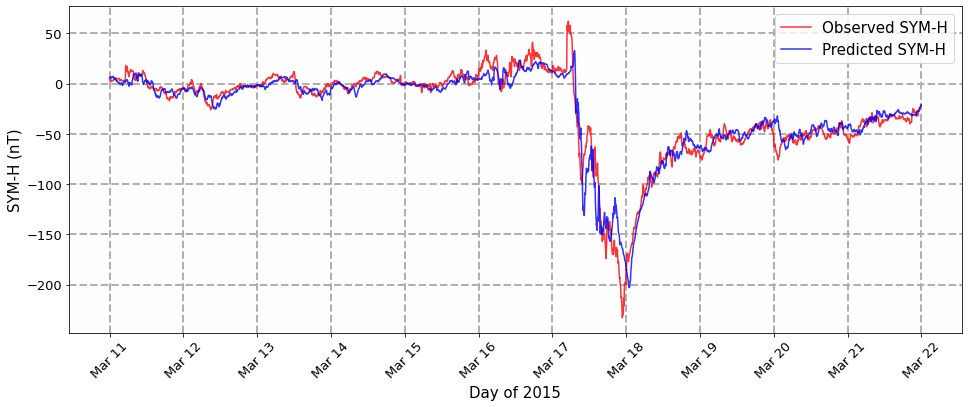

Test storm number 42, from 2018-08-22 00:00:00 until 2018-09-03 23:55:00
t+60


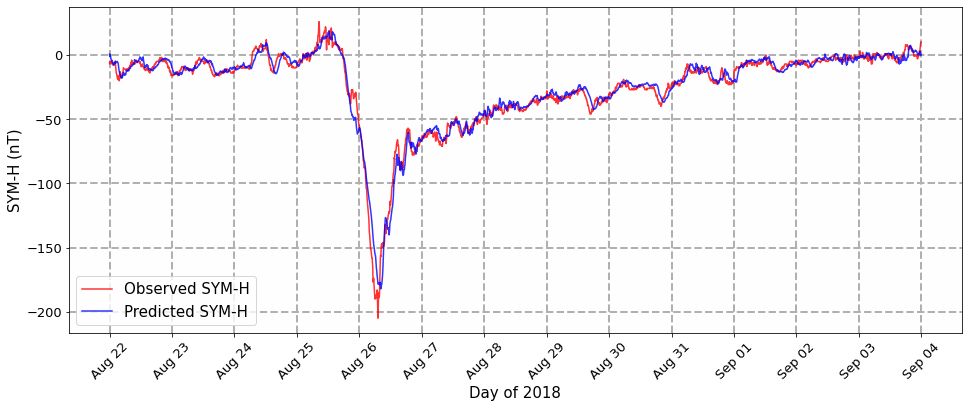

t+120


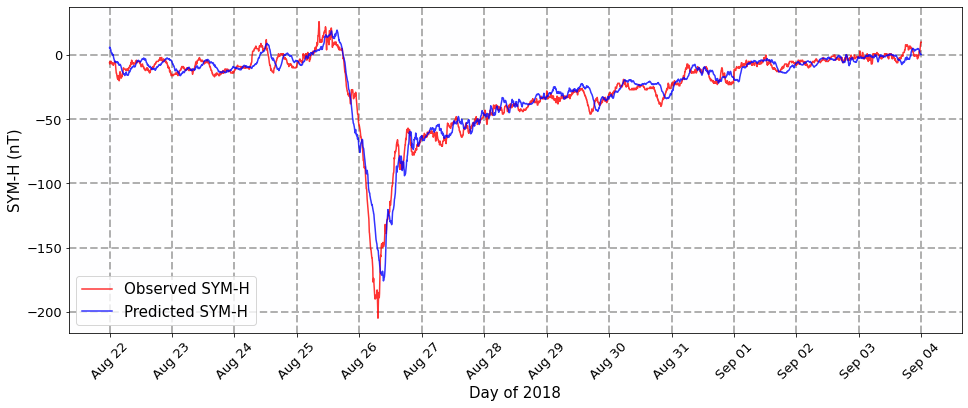

StormIndex  Baseline R2 t120  ...  Network RMSE t120  Network RMSE t60
0          26             0.555  ...              8.918             6.630
1          27             0.826  ...             13.418             8.913
2          28             0.838  ...              5.877             5.858
3          29             0.777  ...              9.314             6.683
4          30             0.891  ...              7.288             5.200
5          31             0.885  ...             12.436             8.584
6          32             0.795  ...              8.937             7.259
7          33             0.825  ...             18.481            13.340
8          34             0.548  ...             13.941            10.034
9          35             0.805  ...              9.932             7.693
10         36             0.677  ...             12.058             9.525
11         37             0.865  ...             21.084            15.184
12         38             0.802  ...              5.213             4.080
13         39             0.754  ...              6.798             6.431
14         40             0.937  ...              5.281             4.673
15         41             0.882  ...             11.707             7.882
16         42             0.898  ...              8.273             5.669
17      Mean:             0.798  ...             10.527             7.861

[18 rows x 9 columns]

In [15]:
resumen_df = pd.DataFrame(
    columns=["StormIndex"]
)

start_index_storm = 26

for storm_index, (storm_start, storm_end) in enumerate(zip(TESTING_STORMS_DATES_START_SYM, TESTING_STORMS_DATES_END_SYM)):
    start_date = pd.to_datetime(
        storm_start, format="%Y%m%d", errors="ignore"
    )
    end_date = pd.to_datetime(
        storm_end, format="%Y%m%d%H%M", errors="ignore"
    )

    print(
        f"Test storm number {storm_index + start_index_storm}, from {start_date} until {end_date}"
    )
    
    out = df_storms_sym[start_date : end_date].copy()
    out_60 = df_storms_sym_60[start_date : end_date].copy()
    out_120 = df_storms_sym_120[start_date : end_date].copy()    

    rmse_60 = msem(
        out[start_date:end_date].iloc[:-12]["og_SYM-H_t+60"],
        out[start_date:end_date].iloc[:-12]["pred_SYM-H_t+60"],
        squared=False,
    )
    r2_60 = r2m(
        out[start_date:end_date].iloc[:-12]["og_SYM-H_t+60"],
        out[start_date:end_date].iloc[:-12]["pred_SYM-H_t+60"],
    )

    rmse_120 = msem(
        out[start_date:end_date].iloc[:-24]["og_SYM-H_t+120"],
        out[start_date:end_date].iloc[:-24]["pred_SYM-H_t+120"],
        squared=False,
    )
    r2_120 = r2m(
        out[start_date:end_date].iloc[:-24]["og_SYM-H_t+120"],
        out[start_date:end_date].iloc[:-24]["pred_SYM-H_t+120"],
    )

    rmse_base_60 = msem(
        out[start_date:end_date].iloc[:-12]["og_SYM-H_t+60"],
        out[start_date:end_date].iloc[:-12]["og_SYM-H_t0"],
        squared=False,
    )
    r2_base_60 = r2m(
        out[start_date:end_date].iloc[:-12]["og_SYM-H_t+60"],
        out[start_date:end_date].iloc[:-12]["og_SYM-H_t0"],
    )

    rmse_base_120 = msem(
        out[start_date:end_date].iloc[:-24]["og_SYM-H_t+120"],
        out[start_date:end_date].iloc[:-24]["og_SYM-H_t0"],
        squared=False,
    )
    r2_base_120 = r2m(
        out[start_date:end_date].iloc[:-24]["og_SYM-H_t+120"],
        out[start_date:end_date].iloc[:-24]["og_SYM-H_t0"],
    )
    print('t+60')

    fig, axs = plt.subplots(figsize=(16,6))
    #fig.suptitle('desde {} hasta {} SYM-H index'.format(start_date, end_date), fontsize=120)

    axs.plot(out_60[start_date:end_date].index, out_60[start_date:end_date]['og_SYM-H_t+60'], color='red', alpha=0.8)
    axs.plot(out_60[start_date:end_date].index, out_60[start_date:end_date]['pred_SYM-H_t+60'], color='blue', alpha=0.8)
    #axs.set_title('desde {} hasta {} SYM-H index'.format(start_date, end_date) + '\npredictions in blue real in red\nmse: ' + str(mse_sym.round(decimals=3)) + '\nmae:  ' + str(mae_sym.round(decimals=3)) + '\ncorr:  ' + str(corr_sym.round(decimals=3)), fontsize= 8)
    xlab = 'Day of ' + str(start_date.year)
    axs.set(xlabel=xlab, ylabel='SYM-H (nT)')



    axs.xaxis.set_major_locator(mdates.DayLocator())
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    for tick in axs.xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in axs.yaxis.get_major_ticks():
        tick.label.set_fontsize(13) 
    axs.yaxis.label.set_size(15)
    axs.xaxis.label.set_size(15)
    axs.grid(True, linestyle='--', linewidth=2)
    axs.legend(['Observed SYM-H', 'Predicted SYM-H'], fontsize = 15)

    plt.xticks(rotation=45)

    if (SAVE_FIGS):
        plt.savefig(f'./plots_out/SYM_storm_{storm_index + start_index_storm}_t60.png');


    plt.show();
    print('t+120')

    fig, axs = plt.subplots(figsize=(16,6))
    #fig.suptitle('desde {} hasta {} SYM-H index'.format(start_date, end_date), fontsize=120)

    axs.plot(out_120[start_date:end_date].index, out_120[start_date:end_date]['og_SYM-H_t+120'], color='red', alpha=0.8)
    axs.plot(out_120[start_date:end_date].index, out_120[start_date:end_date]['pred_SYM-H_t+120'], color='blue', alpha=0.8)
    #axs.set_title('desde {} hasta {} SYM-H index'.format(start_date, end_date) + '\npredictions in blue real in red\nmse: ' + str(mse_sym.round(decimals=3)) + '\nmae:  ' + str(mae_sym.round(decimals=3)) + '\ncorr:  ' + str(corr_sym.round(decimals=3)), fontsize= 8)
    xlab = 'Day of ' + str(start_date.year)
    axs.set(xlabel=xlab, ylabel='SYM-H (nT)')



    axs.xaxis.set_major_locator(mdates.DayLocator())
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    for tick in axs.xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in axs.yaxis.get_major_ticks():
        tick.label.set_fontsize(13) 
    axs.yaxis.label.set_size(15)
    axs.xaxis.label.set_size(15)
    axs.grid(True, linestyle='--', linewidth=2)
    axs.legend(['Observed SYM-H', 'Predicted SYM-H'], fontsize = 15)

    plt.xticks(rotation=45)

    if (SAVE_FIGS):
        plt.savefig(f'./plots_out/SYM_storm_{storm_index + start_index_storm}_t120.png');


    plt.show();

    resumen_df = resumen_df.append(
        {
            "StormIndex": str(storm_index + start_index_storm),
            "Network RMSE t60": rmse_60,
            "Network R2 t60": r2_60,
            "Baseline RMSE t60": rmse_base_60,
            "Baseline R2 t60": r2_base_60,
            "Network RMSE t120": rmse_120,
            "Network R2 t120": r2_120,            
            "Baseline RMSE t120": rmse_base_120,
            "Baseline R2 t120": r2_base_120,
        },
        ignore_index=True,
    )

resumen_df = resumen_df.append(
    {
        "StormIndex": "Mean:",        
        "Network RMSE t60": np.mean(resumen_df["Network RMSE t60"]),
        "Network R2 t60": np.mean(resumen_df["Network R2 t60"]),
        "Baseline RMSE t60": np.mean(resumen_df["Baseline RMSE t60"]),
        "Baseline R2 t60": np.mean(resumen_df["Baseline R2 t60"]),
        "Network RMSE t120": np.mean(resumen_df["Network RMSE t120"]),
        "Network R2 t120": np.mean(resumen_df["Network R2 t120"]),
        "Baseline RMSE t120": np.mean(resumen_df["Baseline RMSE t120"]),
        "Baseline R2 t120": np.mean(resumen_df["Baseline R2 t120"]),
    },
    ignore_index=True,
)

display(resumen_df)

In [16]:
resumen_df = resumen_df[['StormIndex', 'Baseline RMSE t60', 'Network RMSE t60', 'Baseline R2 t60','Network R2 t60', 'Baseline RMSE t120', 'Network RMSE t120', 'Baseline R2 t120', 'Network R2 t120']]
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print(resumen_df.to_latex(index=False))  


\begin{tabular}{lrrrrrrrr}
\toprule
StormIndex &  Baseline RMSE t60 &  Network RMSE t60 &  Baseline R2 t60 &  Network R2 t60 &  Baseline RMSE t120 &  Network RMSE t120 &  Baseline R2 t120 &  Network R2 t120 \\
\midrule
        26 &              7.606 &             6.630 &            0.830 &           0.870 &              12.297 &              8.918 &             0.555 &            0.766 \\
        27 &              9.427 &             8.913 &            0.932 &           0.939 &              15.050 &             13.418 &             0.826 &            0.862 \\
        28 &              5.858 &             5.858 &            0.936 &           0.936 &               9.332 &              5.877 &             0.838 &            0.936 \\
        29 &              7.134 &             6.683 &            0.911 &           0.922 &              11.305 &              9.314 &             0.777 &            0.849 \\
        30 &              4.793 &             5.200 &            0.954 &           0.

Testing year 2013
t+60


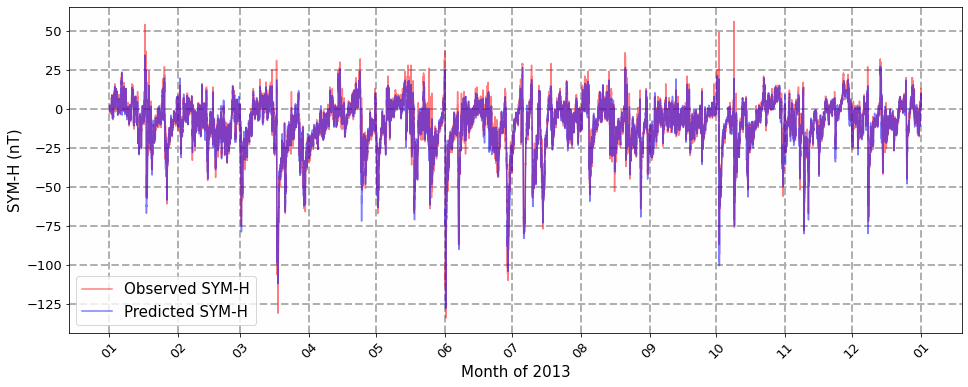

t+120


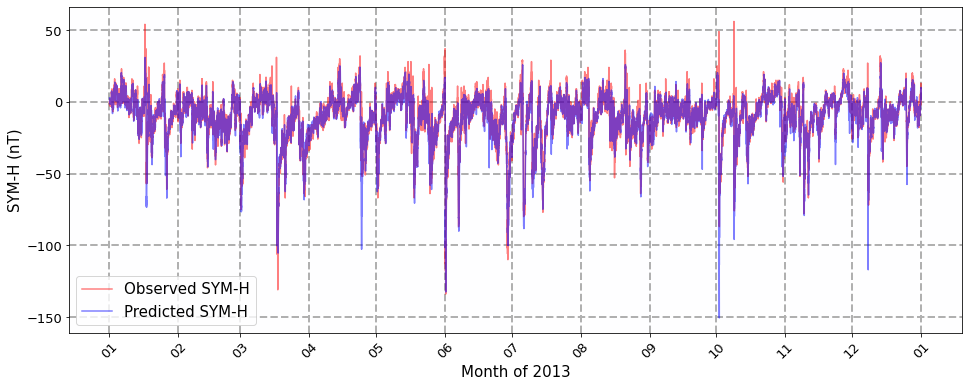

Testing year 2014
t+60


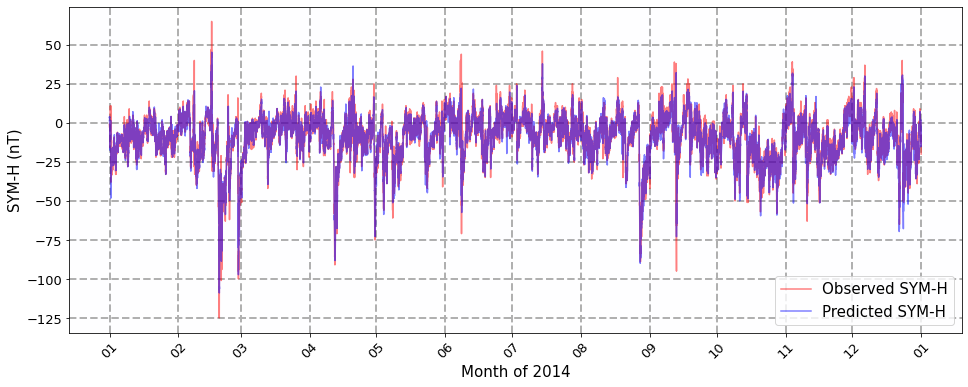

t+120


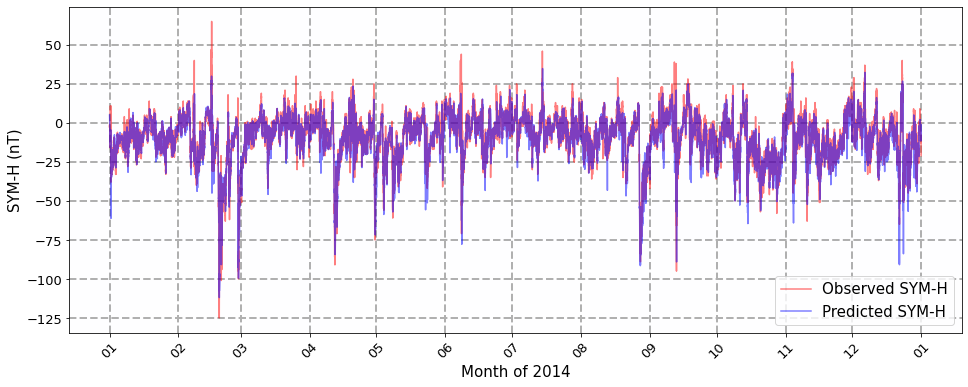

Testing year 2015
t+60


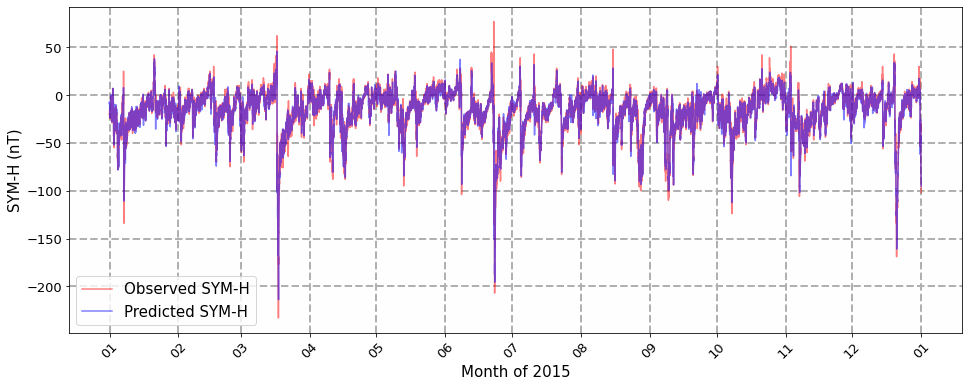

t+120


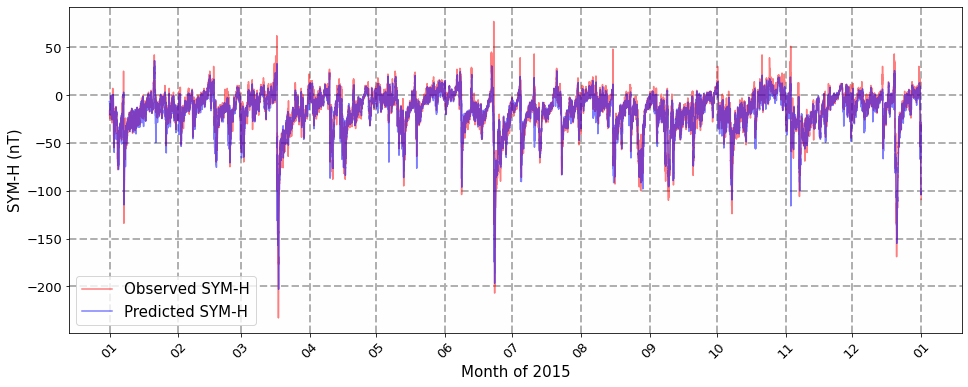

Testing year 2016
t+60


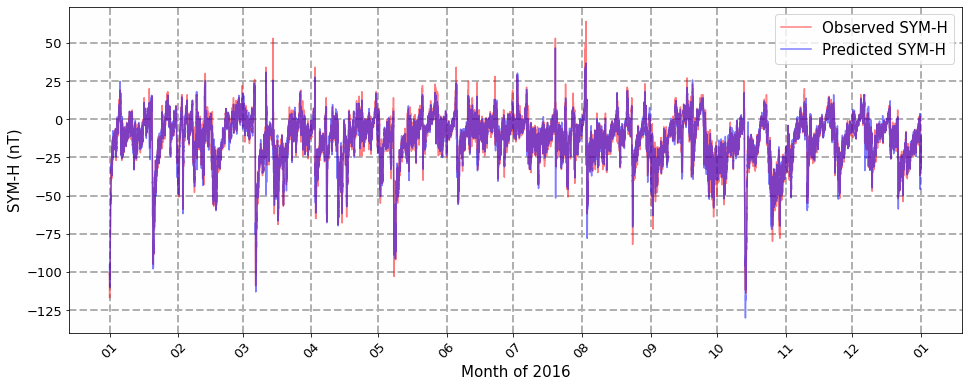

t+120


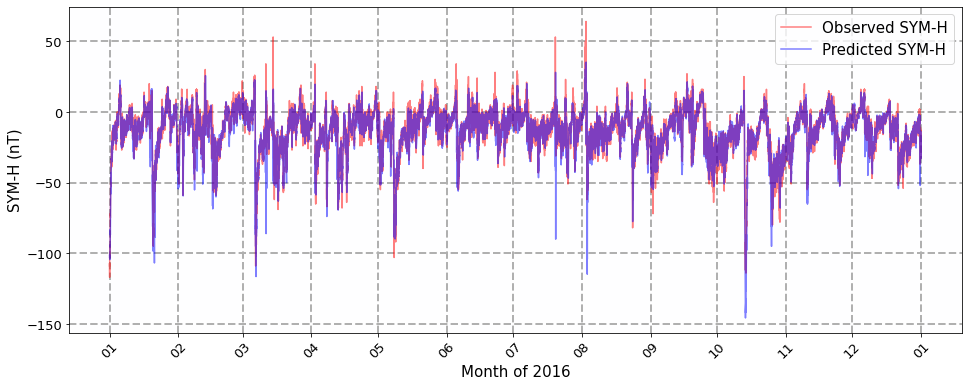

Testing year 2017
t+60


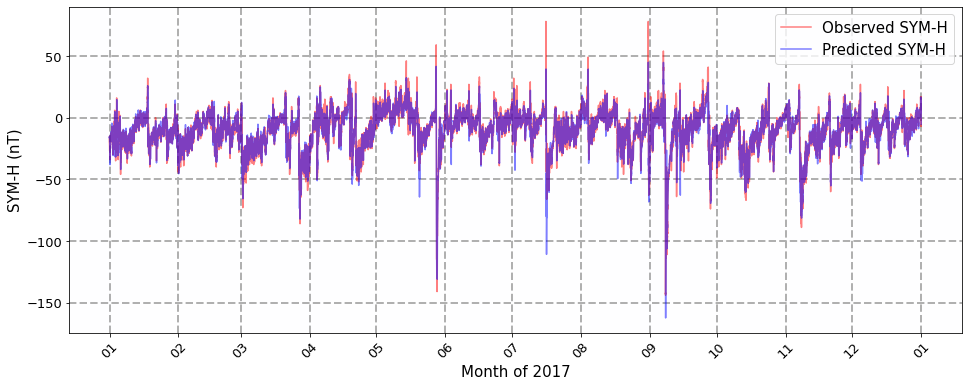

t+120


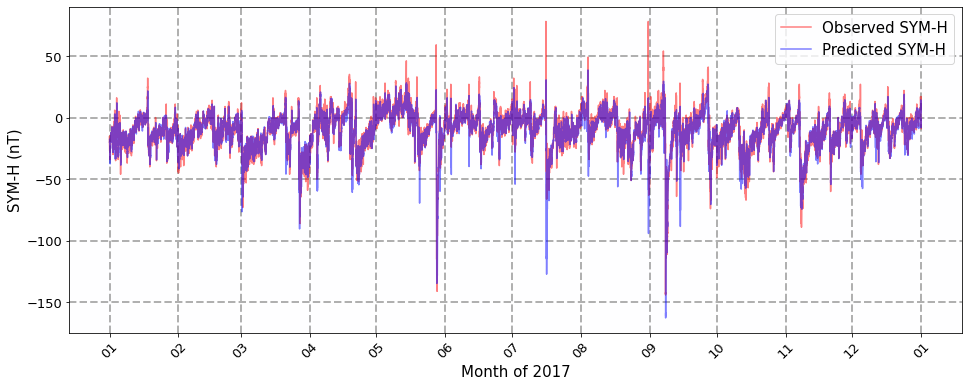

Testing year 2018
t+60


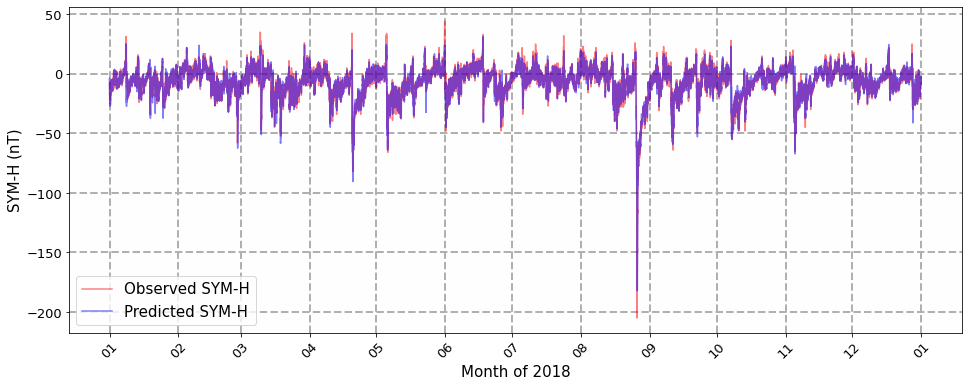

t+120


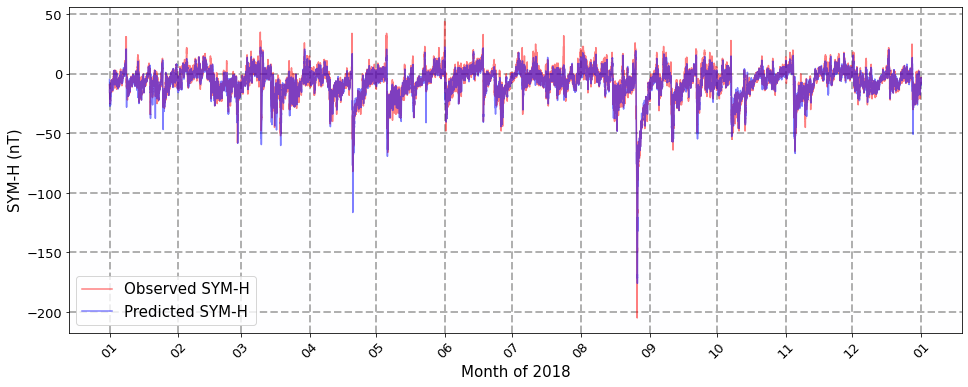

Testing year 2019
t+60


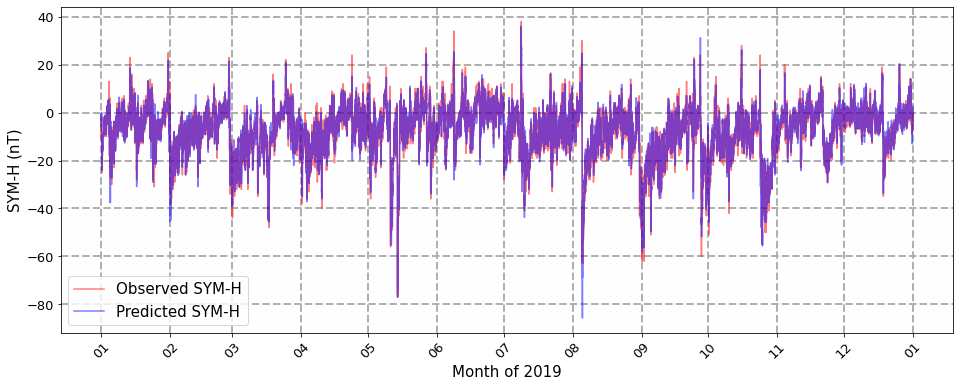

t+120


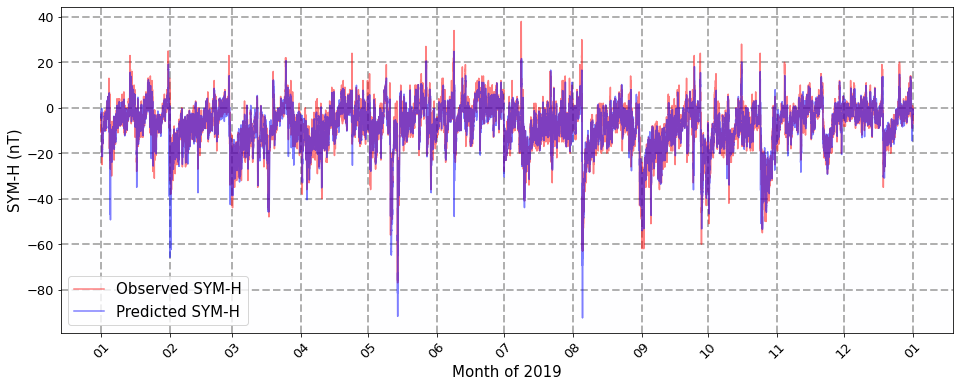

Testing year 2020
t+60


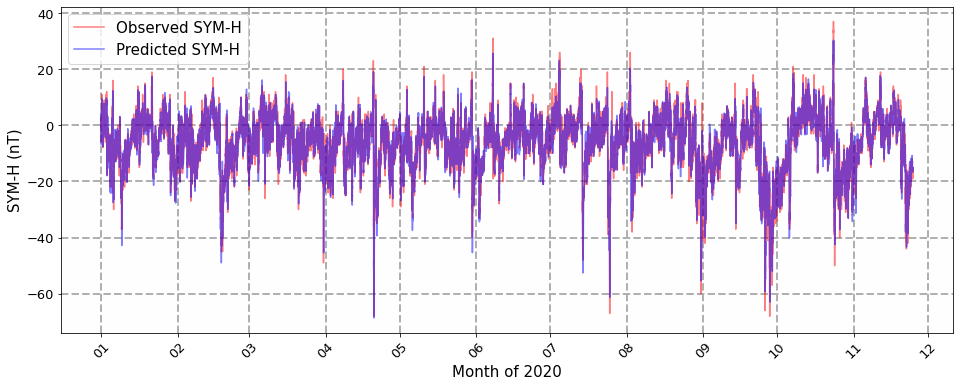

t+120


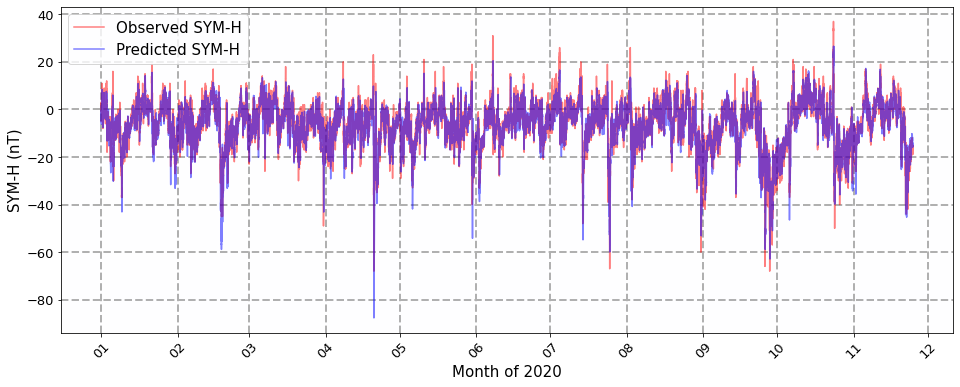

Year  Baseline RMSE t60  ...  Baseline R2 t120  Network R2 t120
0   2013              4.891  ...             0.804            0.845
1   2014              4.990  ...             0.754            0.802
2   2015              6.383  ...             0.820            0.870
3   2016              5.119  ...             0.779            0.814
4   2017              5.294  ...             0.755            0.801
5   2018              4.198  ...             0.773            0.814
6   2019              3.849  ...             0.708            0.750
7   2020              3.690  ...             0.688            0.743
8  Mean:              4.802  ...             0.760            0.805

[9 rows x 9 columns]

In [17]:
start_year = 2013
end_year = 2020

resumen_df = pd.DataFrame(
    columns=["Year"]
)

for i_year in range(end_year - start_year + 1):
    yy = i_year + start_year

    if i_year == 0:
        start_date = pd.to_datetime(
            str(start_year + i_year) + "01010320", format="%Y%m%d%H%M", errors="ignore"
        )    
    else: 
        start_date = pd.to_datetime(
            str(start_year + i_year) + "0101", format="%Y%m%d", errors="ignore"
        )
    end_date = pd.to_datetime(
        str(start_year + i_year) + "12312355", format="%Y%m%d%H%M", errors="ignore"
    )

    
    print(
        f"Testing year {yy}"
    )    

    out = df_quiet_sym[start_date : end_date].copy()
    out_60 = df_quiet_sym_60[start_date : end_date].copy()
    out_120 = df_quiet_sym_120[start_date : end_date].copy()

    rmse_60 = msem(
        out[start_date:end_date].iloc[:-12]["og_SYM-H_t+60"],
        out[start_date:end_date].iloc[:-12]["pred_SYM-H_t+60"],
        squared=False,
    )
    r2_60 = r2m(
        out[start_date:end_date].iloc[:-12]["og_SYM-H_t+60"],
        out[start_date:end_date].iloc[:-12]["pred_SYM-H_t+60"],
    )

    rmse_120 = msem(
        out[start_date:end_date].iloc[:-24]["og_SYM-H_t+120"],
        out[start_date:end_date].iloc[:-24]["pred_SYM-H_t+120"],
        squared=False,
    )
    r2_120 = r2m(
        out[start_date:end_date].iloc[:-24]["og_SYM-H_t+120"],
        out[start_date:end_date].iloc[:-24]["pred_SYM-H_t+120"],
    )

    rmse_base_60 = msem(
        out[start_date:end_date].iloc[:-12]["og_SYM-H_t+60"],
        out[start_date:end_date].iloc[:-12]["og_SYM-H_t0"],
        squared=False,
    )
    r2_base_60 = r2m(
        out[start_date:end_date].iloc[:-12]["og_SYM-H_t+60"],
        out[start_date:end_date].iloc[:-12]["og_SYM-H_t0"],
    )

    rmse_base_120 = msem(
        out[start_date:end_date].iloc[:-24]["og_SYM-H_t+120"],
        out[start_date:end_date].iloc[:-24]["og_SYM-H_t0"],
        squared=False,
    )
    r2_base_120 = r2m(
        out[start_date:end_date].iloc[:-24]["og_SYM-H_t+120"],
        out[start_date:end_date].iloc[:-24]["og_SYM-H_t0"],
    )
    print('t+60')

    fig, axs = plt.subplots(figsize=(16,6))
    #fig.suptitle('desde {} hasta {} SYM-H index'.format(start_date, end_date), fontsize=120)

    axs.plot(out_60[start_date:end_date].index, out_60[start_date:end_date]['og_SYM-H_t+60'], color='red', alpha=0.5)
    axs.plot(out_60[start_date:end_date].index, out_60[start_date:end_date]['pred_SYM-H_t+60'], color='blue', alpha=0.5)
    #axs.set_title('desde {} hasta {} SYM-H index'.format(start_date, end_date) + '\npredictions in blue real in red\nmse: ' + str(mse_sym.round(decimals=3)) + '\nmae:  ' + str(mae_sym.round(decimals=3)) + '\ncorr:  ' + str(corr_sym.round(decimals=3)), fontsize= 8)
    xlab = 'Month of ' + str(yy)
    axs.set(xlabel = xlab, ylabel='SYM-H (nT)')



    axs.xaxis.set_major_locator(mdates.MonthLocator())
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
    for tick in axs.xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in axs.yaxis.get_major_ticks():
        tick.label.set_fontsize(13) 
    axs.yaxis.label.set_size(15)
    axs.xaxis.label.set_size(15)
    axs.grid(True, linestyle='--', linewidth=2)
    axs.legend(['Observed SYM-H', 'Predicted SYM-H'], fontsize = 15)

    plt.xticks(rotation=45)

    if (SAVE_FIGS):
        plt.savefig(f'./plots_out/SYM_quiet_year_{yy}_t60.png');


    plt.show();
    print('t+120')

    fig, axs = plt.subplots(figsize=(16,6))
    #fig.suptitle('desde {} hasta {} SYM-H index'.format(start_date, end_date), fontsize=120)

    axs.plot(out_120[start_date:end_date].index, out_120[start_date:end_date]['og_SYM-H_t+120'], color='red', alpha=0.5)
    axs.plot(out_120[start_date:end_date].index, out_120[start_date:end_date]['pred_SYM-H_t+120'], color='blue', alpha=0.5)
    #axs.set_title('desde {} hasta {} SYM-H index'.format(start_date, end_date) + '\npredictions in blue real in red\nmse: ' + str(mse_sym.round(decimals=3)) + '\nmae:  ' + str(mae_sym.round(decimals=3)) + '\ncorr:  ' + str(corr_sym.round(decimals=3)), fontsize= 8)
    xlab = 'Month of ' + str(yy)
    axs.set(xlabel = xlab, ylabel='SYM-H (nT)')



    axs.xaxis.set_major_locator(mdates.MonthLocator())
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
    for tick in axs.xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in axs.yaxis.get_major_ticks():
        tick.label.set_fontsize(13) 
    axs.yaxis.label.set_size(15)
    axs.xaxis.label.set_size(15)
    axs.grid(True, linestyle='--', linewidth=2)
    axs.legend(['Observed SYM-H', 'Predicted SYM-H'], fontsize = 15)

    plt.xticks(rotation=45)

    if (SAVE_FIGS):
        plt.savefig(f'./plots_out/SYM_quiet_year_{yy}_t120.png');


    plt.show();

    resumen_df = resumen_df.append(
        {
            "Year": str(yy),
            "Network RMSE t60": rmse_60,
            "Network R2 t60": r2_60,
            "Baseline RMSE t60": rmse_base_60,
            "Baseline R2 t60": r2_base_60,
            "Network RMSE t120": rmse_120,
            "Network R2 t120": r2_120,            
            "Baseline RMSE t120": rmse_base_120,
            "Baseline R2 t120": r2_base_120,
        },
        ignore_index=True,
    )

resumen_df = resumen_df.append(
    {
        "Year": "Mean:",        
        "Network RMSE t60": np.mean(resumen_df["Network RMSE t60"]),
        "Network R2 t60": np.mean(resumen_df["Network R2 t60"]),
        "Baseline RMSE t60": np.mean(resumen_df["Baseline RMSE t60"]),
        "Baseline R2 t60": np.mean(resumen_df["Baseline R2 t60"]),
        "Network RMSE t120": np.mean(resumen_df["Network RMSE t120"]),
        "Network R2 t120": np.mean(resumen_df["Network R2 t120"]),
        "Baseline RMSE t120": np.mean(resumen_df["Baseline RMSE t120"]),
        "Baseline R2 t120": np.mean(resumen_df["Baseline R2 t120"]),
    },
    ignore_index=True,
)

resumen_df = resumen_df[['Year', 'Baseline RMSE t60', 'Network RMSE t60', 'Baseline R2 t60','Network R2 t60', 'Baseline RMSE t120', 'Network RMSE t120', 'Baseline R2 t120', 'Network R2 t120']]
display(resumen_df)

In [18]:
resumen_df = resumen_df[['Year', 'Baseline RMSE t60', 'Network RMSE t60', 'Baseline R2 t60','Network R2 t60', 'Baseline RMSE t120', 'Network RMSE t120', 'Baseline R2 t120', 'Network R2 t120']]
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print(resumen_df.to_latex(index=False))  


\begin{tabular}{lrrrrrrrr}
\toprule
  Year &  Baseline RMSE t60 &  Network RMSE t60 &  Baseline R2 t60 &  Network R2 t60 &  Baseline RMSE t120 &  Network RMSE t120 &  Baseline R2 t120 &  Network R2 t120 \\
\midrule
  2013 &              4.891 &             4.805 &            0.905 &           0.908 &               7.021 &              6.235 &             0.804 &            0.845 \\
  2014 &              4.990 &             4.981 &            0.880 &           0.881 &               7.145 &              6.420 &             0.754 &            0.802 \\
  2015 &              6.383 &             5.967 &            0.913 &           0.924 &               9.195 &              7.829 &             0.820 &            0.870 \\
  2016 &              5.119 &             5.012 &            0.893 &           0.897 &               7.327 &              6.723 &             0.779 &            0.814 \\
  2017 &              5.294 &             5.135 &            0.881 &           0.888 &               7.58

Test storm number 26, from 1998-06-22 00:00:00 until 1998-06-30 23:55:00
t+60


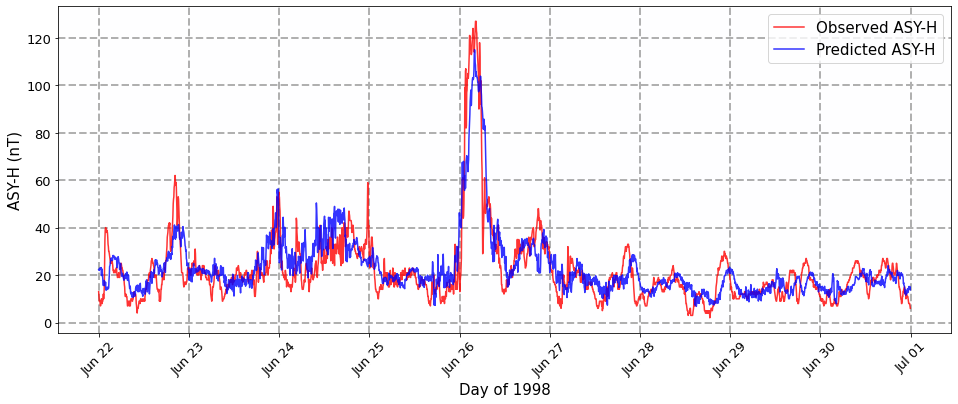

t+120


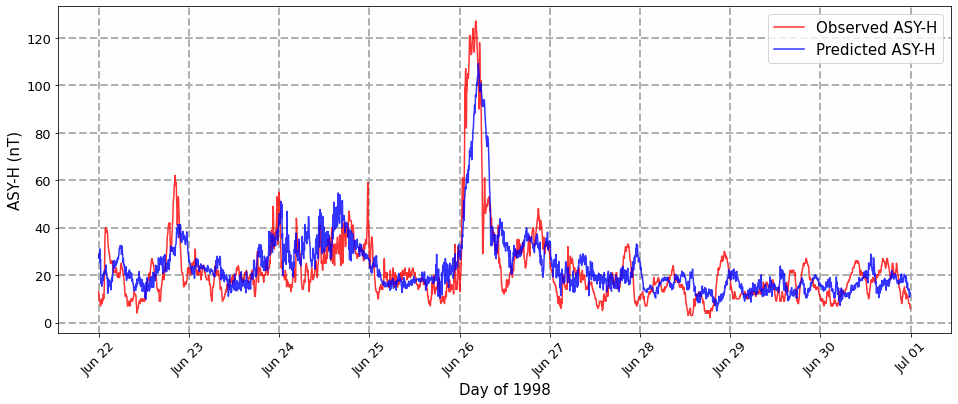

Test storm number 27, from 1998-11-02 00:00:00 until 1998-11-12 23:55:00
t+60


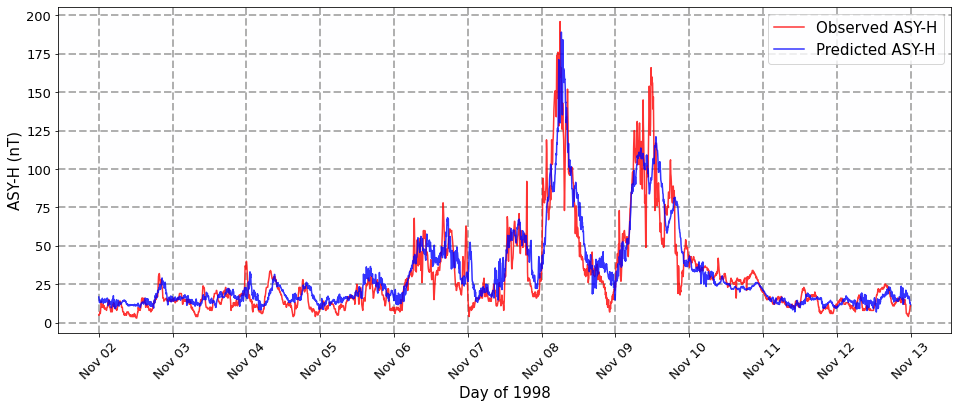

t+120


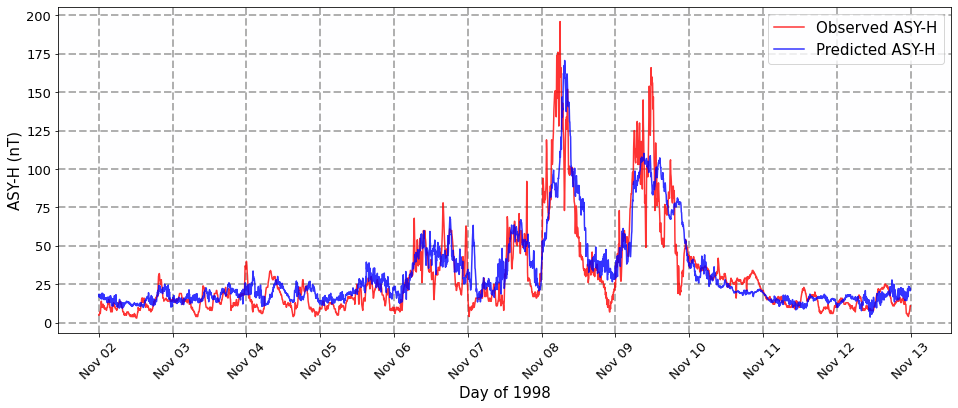

Test storm number 28, from 1999-01-09 00:00:00 until 1999-01-18 23:55:00
t+60


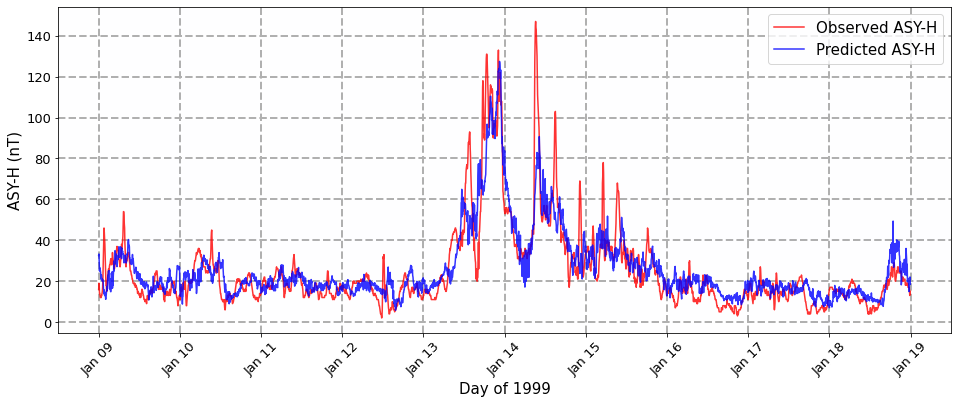

t+120


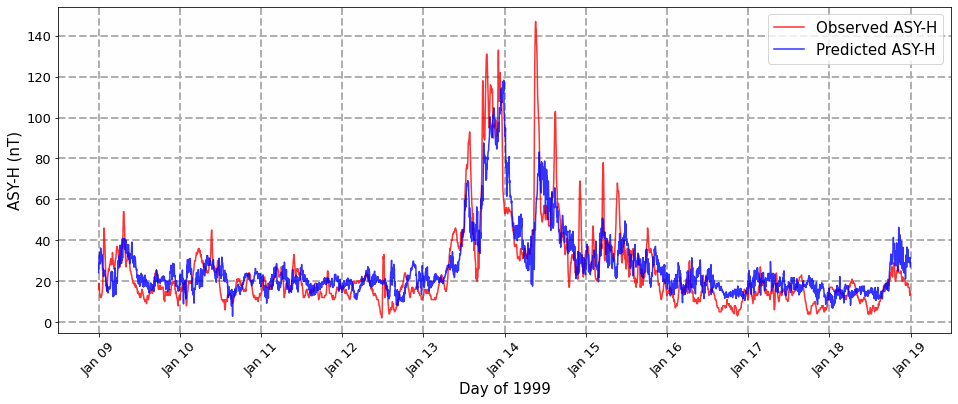

Test storm number 29, from 1999-04-13 00:00:00 until 1999-04-19 23:55:00
t+60


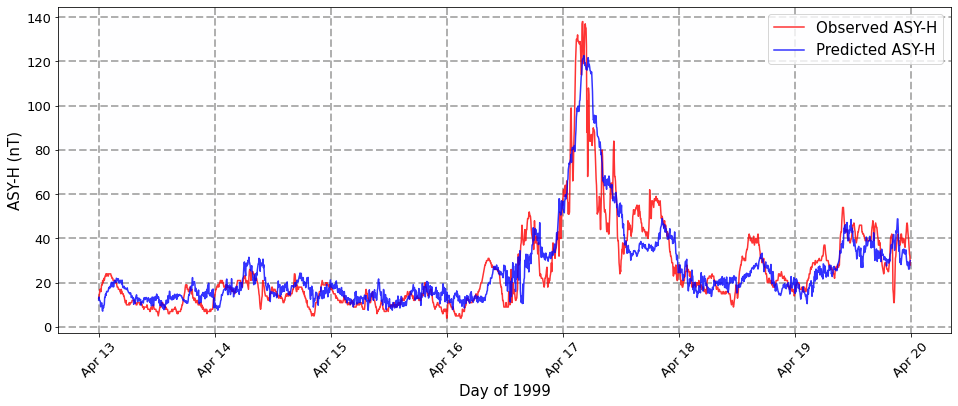

t+120


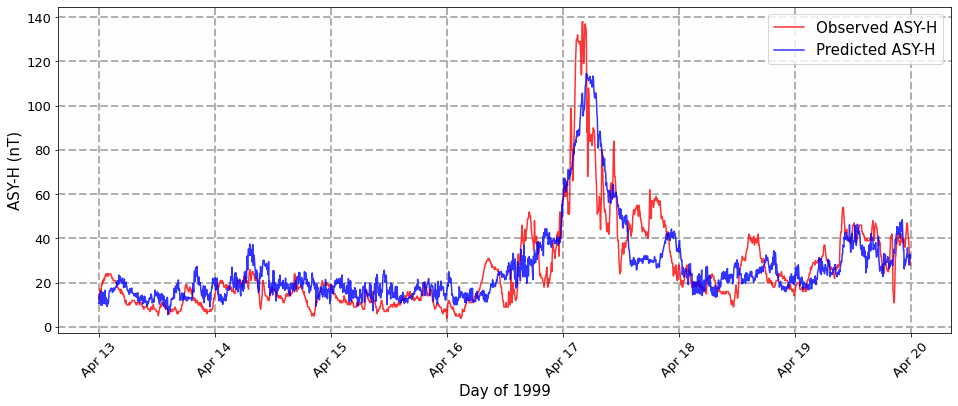

Test storm number 30, from 2000-01-16 00:00:00 until 2000-01-26 23:55:00
t+60


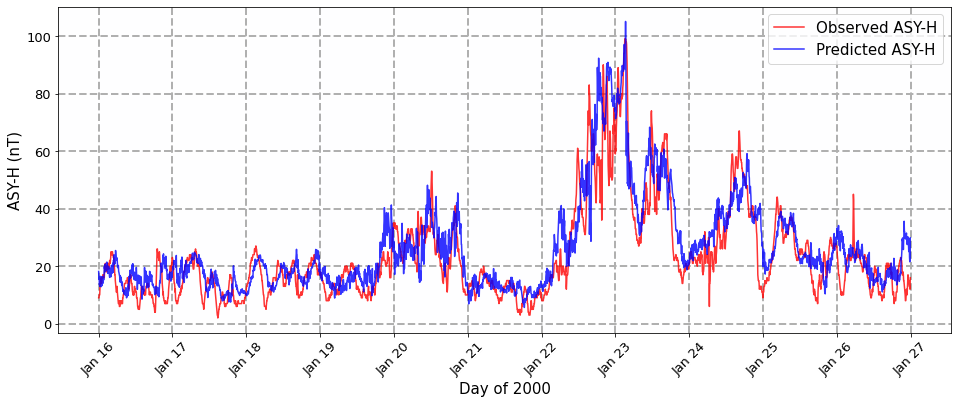

t+120


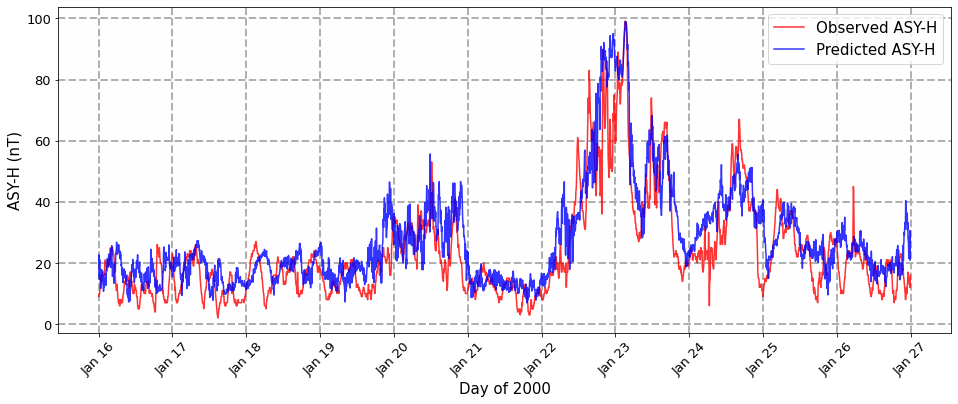

Test storm number 31, from 2000-04-02 00:00:00 until 2000-04-12 23:55:00
t+60


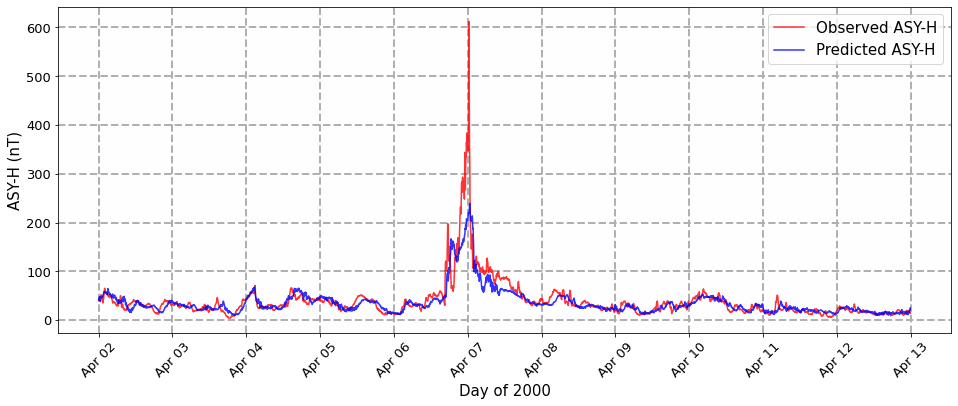

t+120


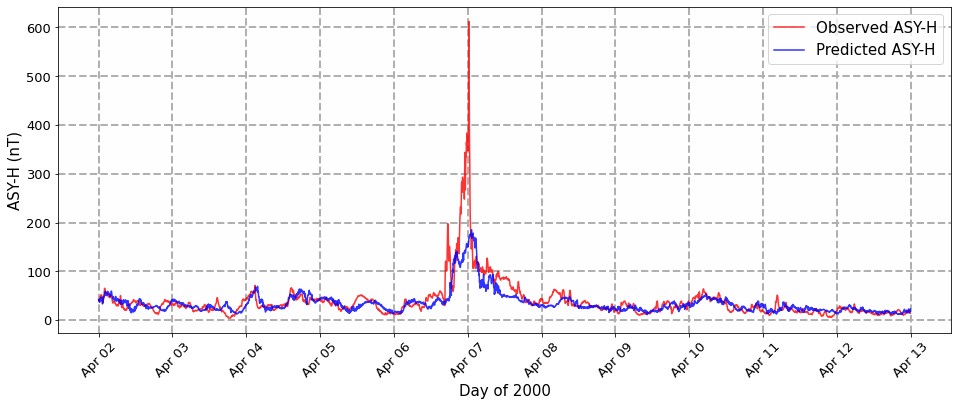

Test storm number 32, from 2000-05-19 00:00:00 until 2000-05-28 23:55:00
t+60


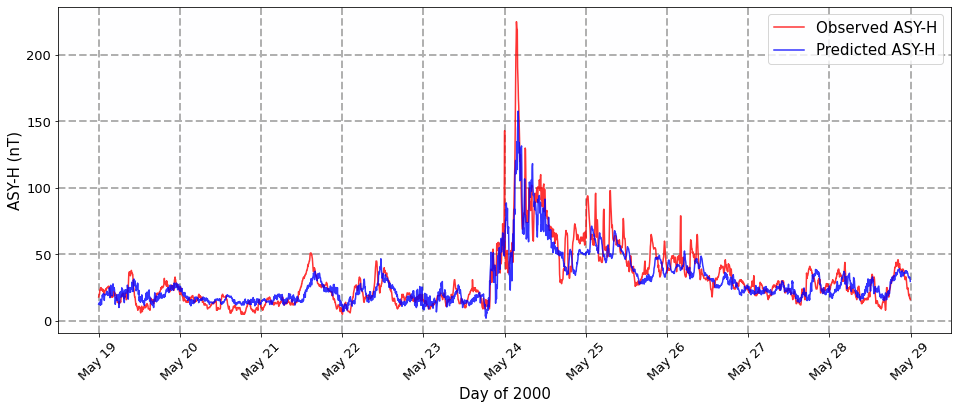

t+120


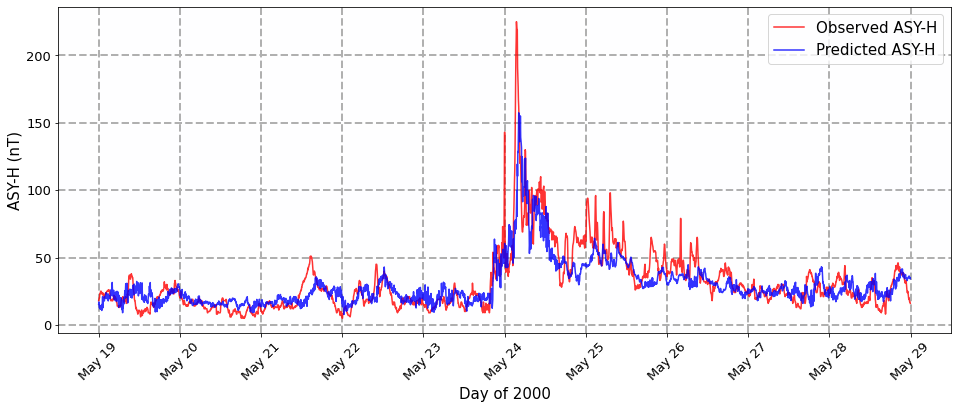

Test storm number 33, from 2001-03-26 00:00:00 until 2001-04-04 23:55:00
t+60


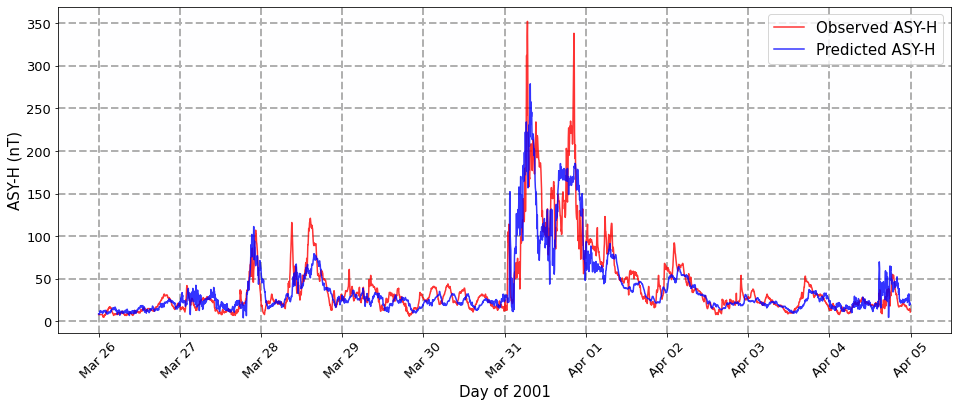

t+120


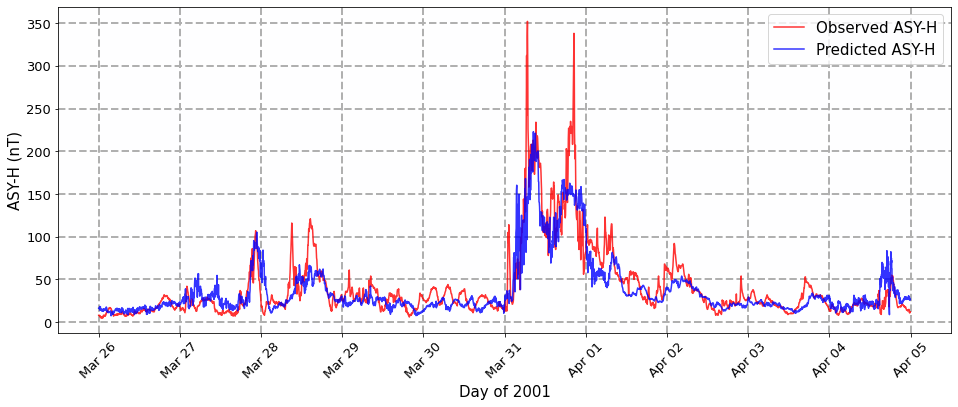

Test storm number 34, from 2003-05-26 00:00:00 until 2003-06-06 23:55:00
t+60


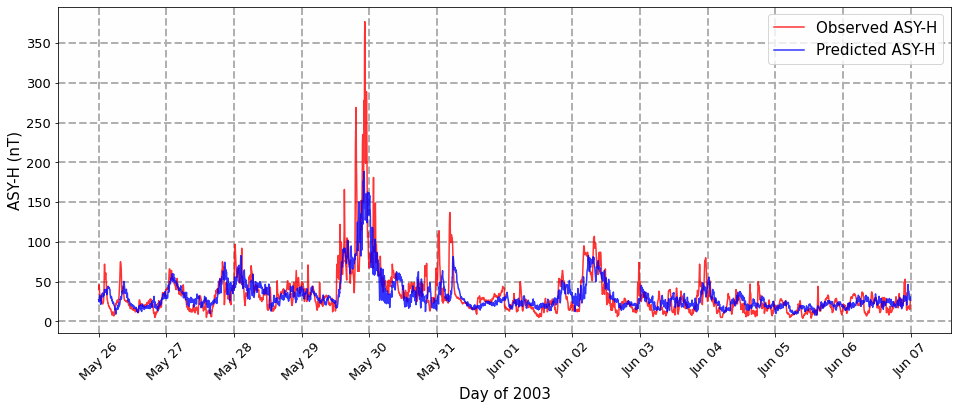

t+120


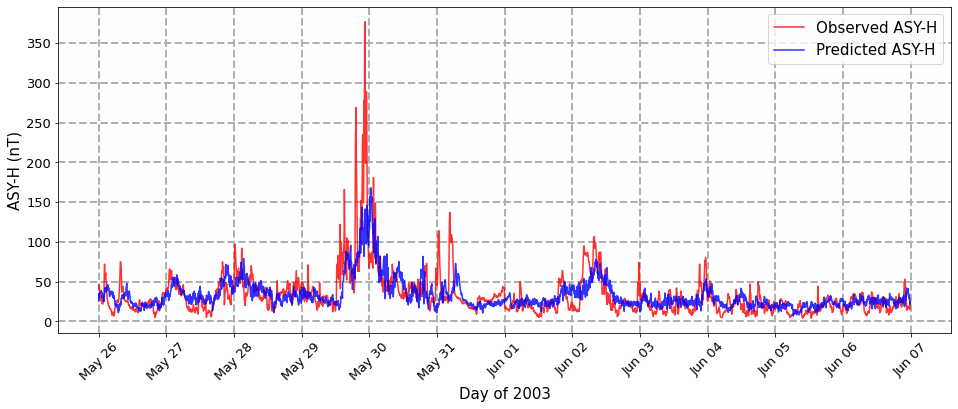

Test storm number 35, from 2003-07-08 00:00:00 until 2003-07-18 23:55:00
t+60


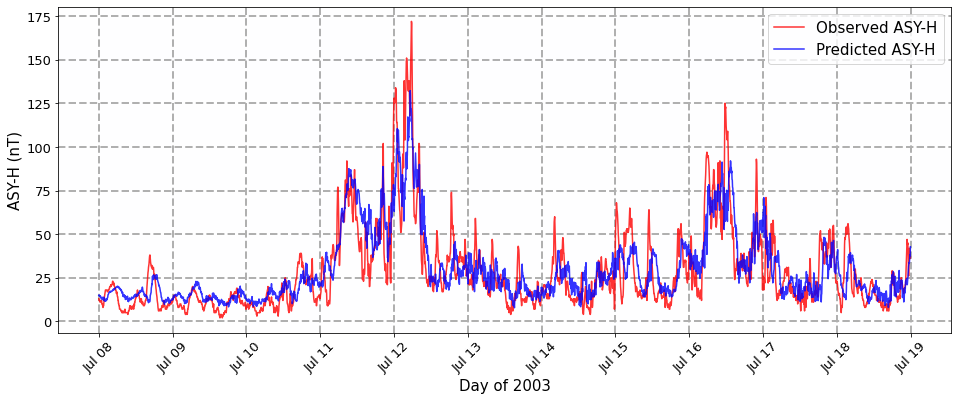

t+120


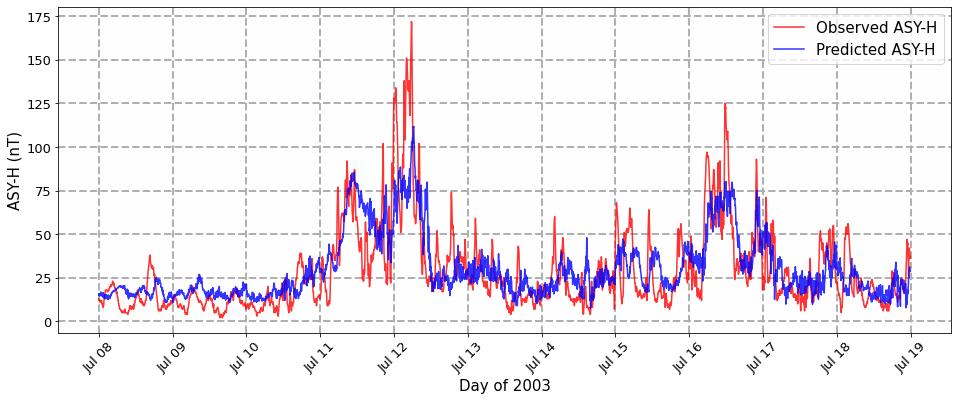

Test storm number 36, from 2004-01-18 00:00:00 until 2004-01-27 23:55:00
t+60


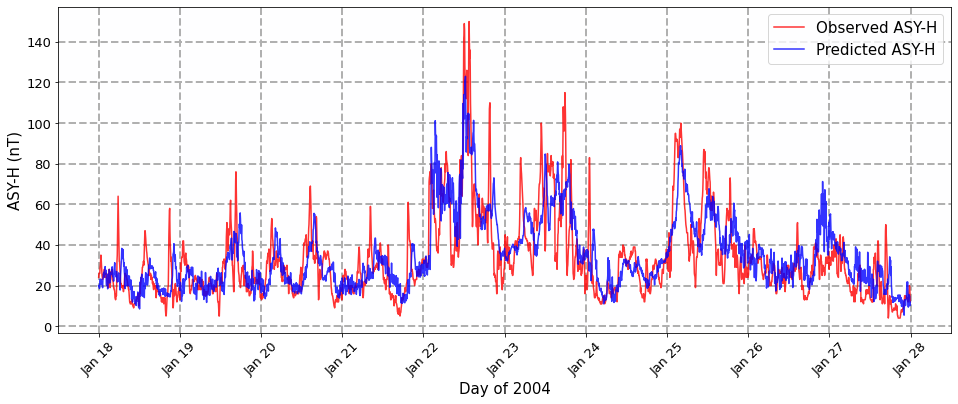

t+120


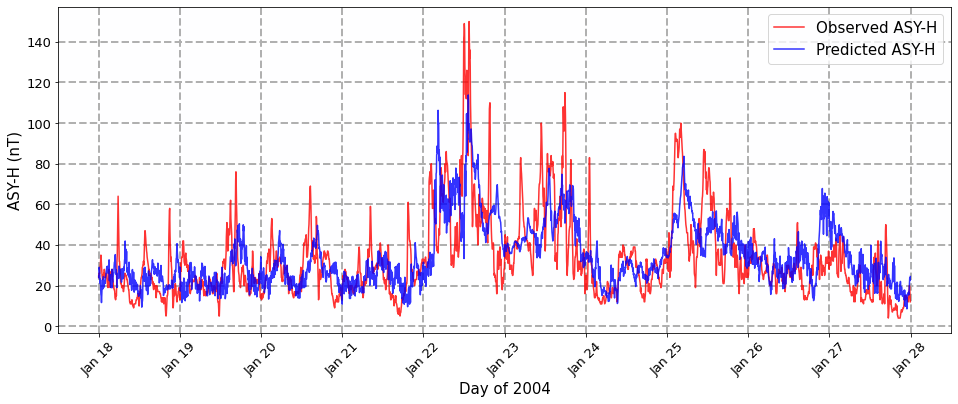

Test storm number 37, from 2004-11-04 00:00:00 until 2004-11-14 23:55:00
t+60


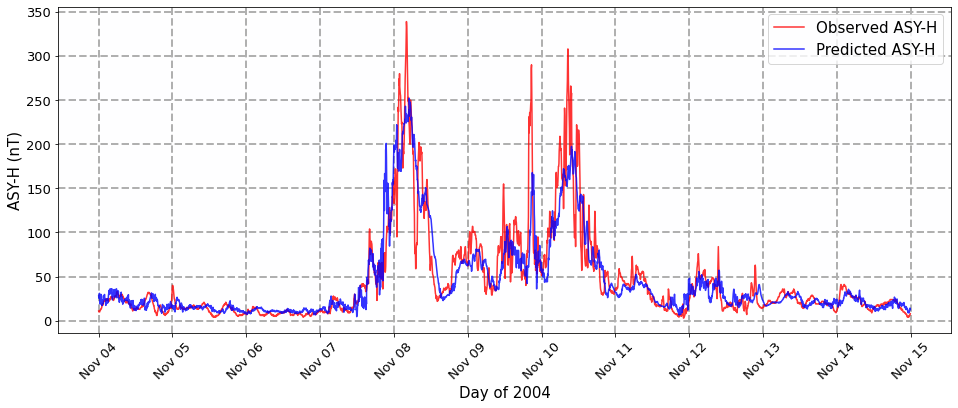

t+120


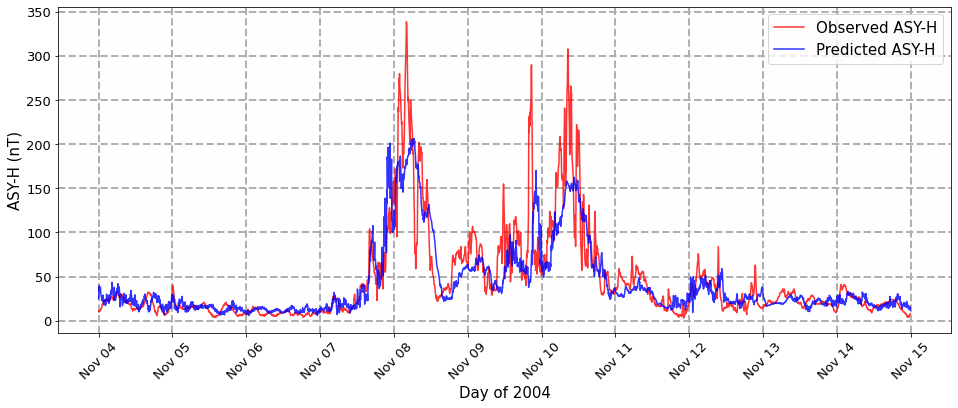

Test storm number 38, from 2012-09-10 00:00:00 until 2012-10-05 23:55:00
t+60


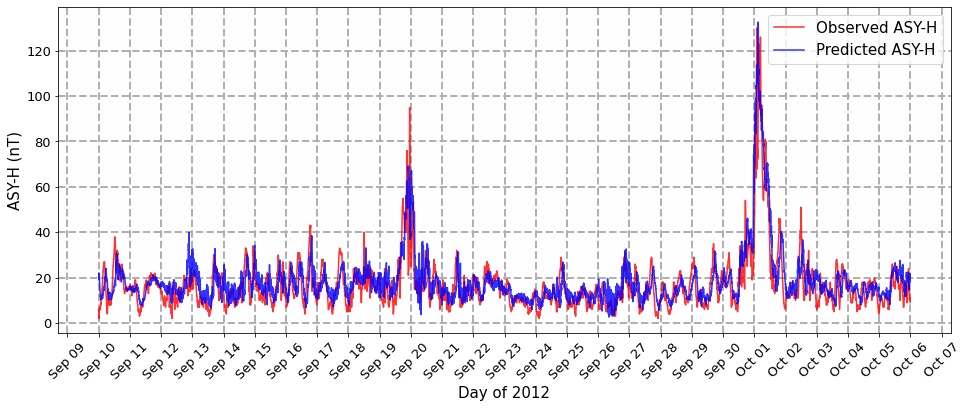

t+120


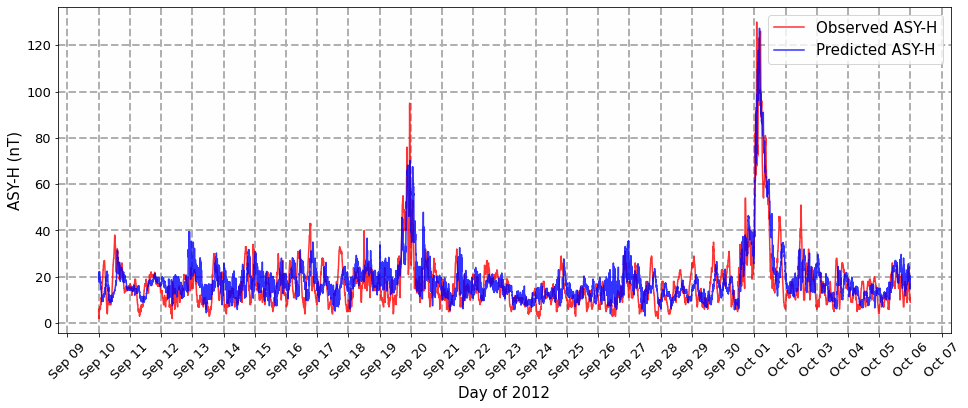

Test storm number 39, from 2013-05-28 00:00:00 until 2013-06-04 23:55:00
t+60


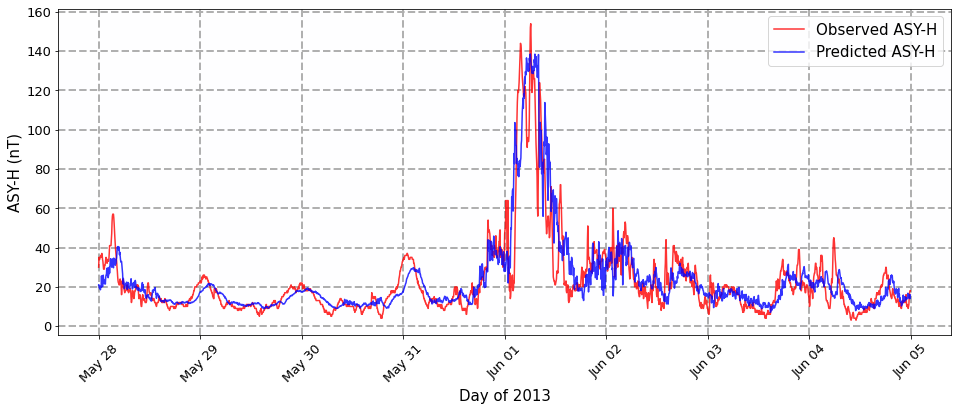

t+120


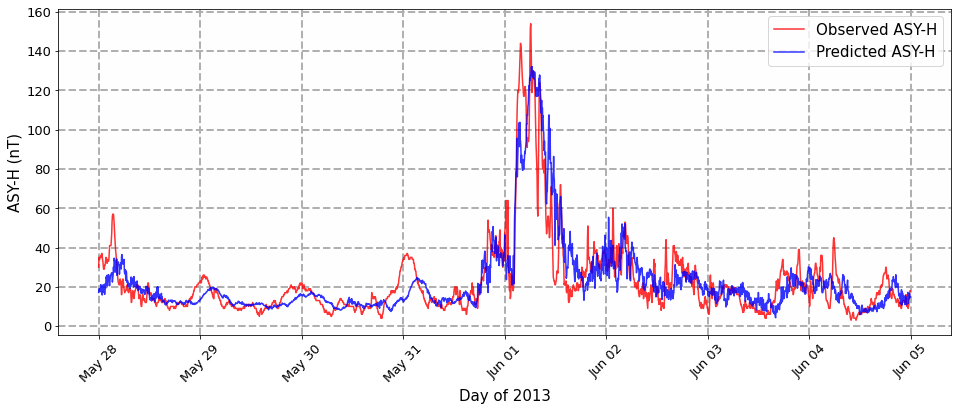

Test storm number 40, from 2013-06-26 00:00:00 until 2013-07-04 23:55:00
t+60


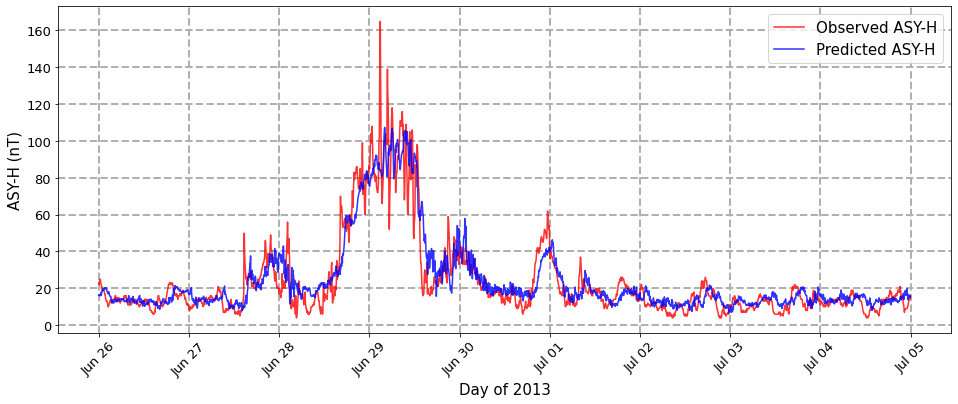

t+120


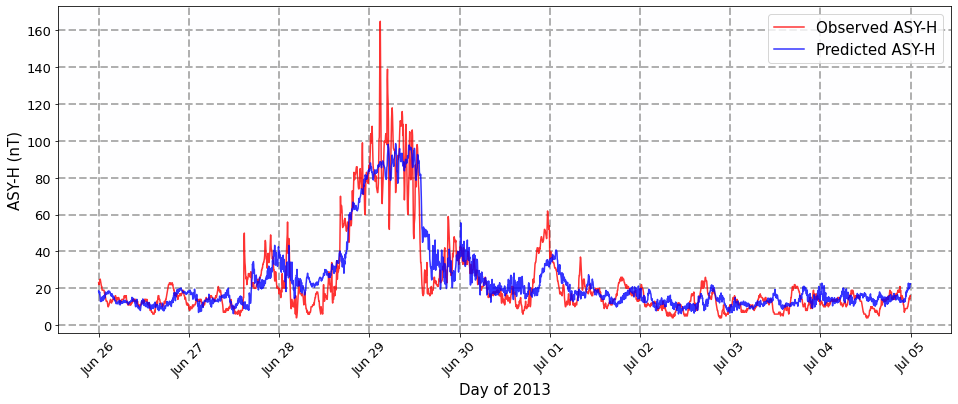

Test storm number 41, from 2015-03-11 00:00:00 until 2015-03-21 23:55:00
t+60


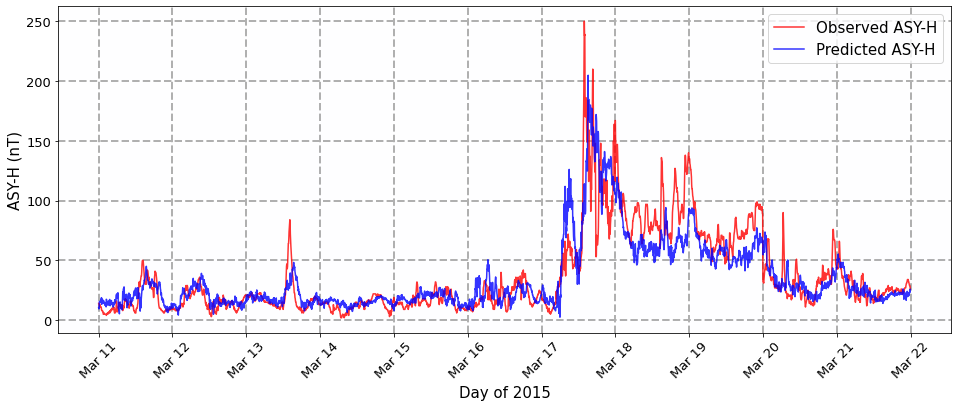

t+120


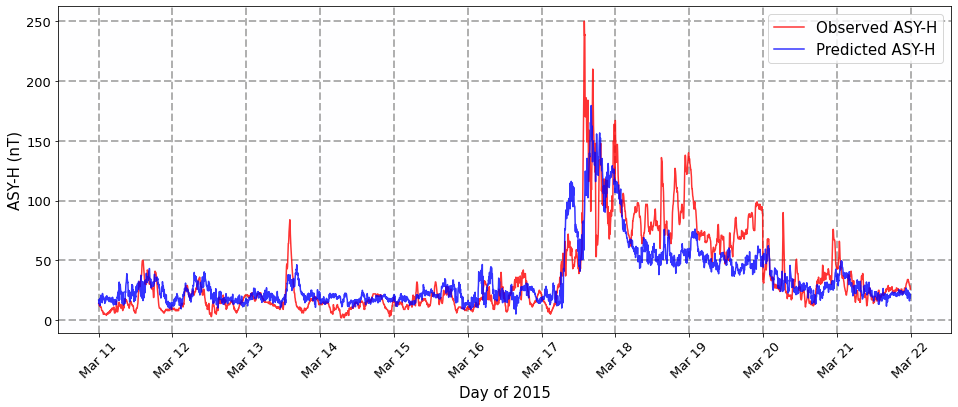

Test storm number 42, from 2018-08-22 00:00:00 until 2018-09-03 23:55:00
t+60


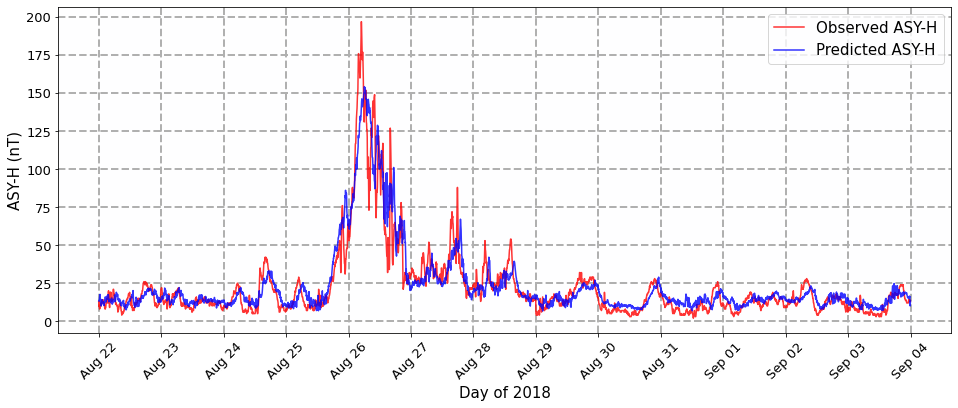

t+120


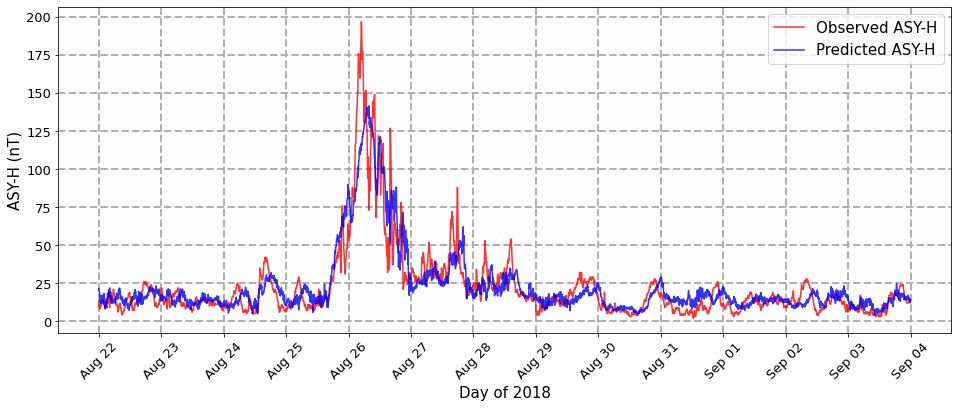

StormIndex  Baseline R2 t120  ...  Network RMSE t120  Network RMSE t60
0          26             0.289  ...             10.298             8.688
1          27             0.606  ...             14.921            12.522
2          28             0.359  ...             11.623            10.442
3          29             0.592  ...             10.843             9.089
4          30             0.528  ...              9.897             8.917
5          31             0.442  ...             26.128            21.174
6          32             0.412  ...             13.285            11.264
7          33             0.554  ...             20.219            18.860
8          34            -0.021  ...             21.359            18.932
9          35             0.209  ...             16.273            13.979
10         36             0.026  ...             16.274            14.116
11         37             0.586  ...             27.533            23.115
12         38             0.324  ...              8.203             7.335
13         39             0.464  ...             10.412            10.639
14         40             0.718  ...              9.826             9.163
15         41             0.611  ...             20.380            17.924
16         42             0.689  ...             11.144             9.944
17      Mean:             0.435  ...             15.213            13.300

[18 rows x 9 columns]

In [19]:
resumen_df = pd.DataFrame(
    columns=["StormIndex"]
)

start_index_storm = 26

for storm_index, (storm_start, storm_end) in enumerate(zip(TESTING_STORMS_DATES_START_ASY, TESTING_STORMS_DATES_END_ASY)):
    start_date = pd.to_datetime(
        storm_start, format="%Y%m%d", errors="ignore"
    )
    end_date = pd.to_datetime(
        storm_end, format="%Y%m%d%H%M", errors="ignore"
    )

    print(
        f"Test storm number {storm_index + start_index_storm}, from {start_date} until {end_date}"
    )
    

    out = df_storms_asy[start_date : end_date].copy()
    out_60 = df_storms_asy_60[start_date : end_date].copy()
    out_120 = df_storms_asy_120[start_date : end_date].copy()

    rmse_60 = msem(
        out[start_date:end_date].iloc[:-12]["og_ASY-H_t+60"],
        out[start_date:end_date].iloc[:-12]["pred_ASY-H_t+60"],
        squared=False,
    )
    r2_60 = r2m(
        out[start_date:end_date].iloc[:-12]["og_ASY-H_t+60"],
        out[start_date:end_date].iloc[:-12]["pred_ASY-H_t+60"],
    )

    rmse_120 = msem(
        out[start_date:end_date].iloc[:-24]["og_ASY-H_t+120"],
        out[start_date:end_date].iloc[:-24]["pred_ASY-H_t+120"],
        squared=False,
    )
    r2_120 = r2m(
        out[start_date:end_date].iloc[:-24]["og_ASY-H_t+120"],
        out[start_date:end_date].iloc[:-24]["pred_ASY-H_t+120"],
    )

    rmse_base_60 = msem(
        out[start_date:end_date].iloc[:-12]["og_ASY-H_t+60"],
        out[start_date:end_date].iloc[:-12]["og_ASY-H_t0"],
        squared=False,
    )
    r2_base_60 = r2m(
        out[start_date:end_date].iloc[:-12]["og_ASY-H_t+60"],
        out[start_date:end_date].iloc[:-12]["og_ASY-H_t0"],
    )

    rmse_base_120 = msem(
        out[start_date:end_date].iloc[:-24]["og_ASY-H_t+120"],
        out[start_date:end_date].iloc[:-24]["og_ASY-H_t0"],
        squared=False,
    )
    r2_base_120 = r2m(
        out[start_date:end_date].iloc[:-24]["og_ASY-H_t+120"],
        out[start_date:end_date].iloc[:-24]["og_ASY-H_t0"],
    )
    print('t+60')

    fig, axs = plt.subplots(figsize=(16,6))
    #fig.suptitle('desde {} hasta {} ASY-H index'.format(start_date, end_date), fontsize=120)

    axs.plot(out_60[start_date:end_date].index, out_60[start_date:end_date]['og_ASY-H_t+60'], color='red', alpha=0.8)
    axs.plot(out_60[start_date:end_date].index, out_60[start_date:end_date]['pred_ASY-H_t+60'], color='blue', alpha=0.8)
    #axs.set_title('desde {} hasta {} ASY-H index'.format(start_date, end_date) + '\npredictions in blue real in red\nmse: ' + str(mse_asy.round(decimals=3)) + '\nmae:  ' + str(mae_asy.round(decimals=3)) + '\ncorr:  ' + str(corr_asy.round(decimals=3)), fontsize= 8)
    xlab = 'Day of ' + str(start_date.year)
    axs.set(xlabel=xlab, ylabel='ASY-H (nT)')



    axs.xaxis.set_major_locator(mdates.DayLocator())
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    for tick in axs.xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in axs.yaxis.get_major_ticks():
        tick.label.set_fontsize(13) 
    axs.yaxis.label.set_size(15)
    axs.xaxis.label.set_size(15)
    axs.grid(True, linestyle='--', linewidth=2)
    axs.legend(['Observed ASY-H', 'Predicted ASY-H'], fontsize = 15)

    plt.xticks(rotation=45)

    if (SAVE_FIGS):
        plt.savefig(f'./plots_out/ASY_storm_{storm_index + start_index_storm}_t60.png');


    plt.show();
    print('t+120')

    fig, axs = plt.subplots(figsize=(16,6))
    #fig.suptitle('desde {} hasta {} ASY-H index'.format(start_date, end_date), fontsize=120)

    axs.plot(out_120[start_date:end_date].index, out_120[start_date:end_date]['og_ASY-H_t+120'], color='red', alpha=0.8)
    axs.plot(out_120[start_date:end_date].index, out_120[start_date:end_date]['pred_ASY-H_t+120'], color='blue', alpha=0.8)
    #axs.set_title('desde {} hasta {} ASY-H index'.format(start_date, end_date) + '\npredictions in blue real in red\nmse: ' + str(mse_asy.round(decimals=3)) + '\nmae:  ' + str(mae_asy.round(decimals=3)) + '\ncorr:  ' + str(corr_asy.round(decimals=3)), fontsize= 8)
    xlab = 'Day of ' + str(start_date.year)
    axs.set(xlabel=xlab, ylabel='ASY-H (nT)')



    axs.xaxis.set_major_locator(mdates.DayLocator())
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    for tick in axs.xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in axs.yaxis.get_major_ticks():
        tick.label.set_fontsize(13) 
    axs.yaxis.label.set_size(15)
    axs.xaxis.label.set_size(15)
    axs.grid(True, linestyle='--', linewidth=2)
    axs.legend(['Observed ASY-H', 'Predicted ASY-H'], fontsize = 15)

    plt.xticks(rotation=45)

    if (SAVE_FIGS):
        plt.savefig(f'./plots_out/ASY_storm_{storm_index + start_index_storm}_t120.png');


    plt.show();

    resumen_df = resumen_df.append(
        {
            "StormIndex": str(storm_index + start_index_storm),
            "Network RMSE t60": rmse_60,
            "Network R2 t60": r2_60,
            "Baseline RMSE t60": rmse_base_60,
            "Baseline R2 t60": r2_base_60,
            "Network RMSE t120": rmse_120,
            "Network R2 t120": r2_120,            
            "Baseline RMSE t120": rmse_base_120,
            "Baseline R2 t120": r2_base_120,
        },
        ignore_index=True,
    )

resumen_df = resumen_df.append(
    {
        "StormIndex": "Mean:",        
        "Network RMSE t60": np.mean(resumen_df["Network RMSE t60"]),
        "Network R2 t60": np.mean(resumen_df["Network R2 t60"]),
        "Baseline RMSE t60": np.mean(resumen_df["Baseline RMSE t60"]),
        "Baseline R2 t60": np.mean(resumen_df["Baseline R2 t60"]),
        "Network RMSE t120": np.mean(resumen_df["Network RMSE t120"]),
        "Network R2 t120": np.mean(resumen_df["Network R2 t120"]),
        "Baseline RMSE t120": np.mean(resumen_df["Baseline RMSE t120"]),
        "Baseline R2 t120": np.mean(resumen_df["Baseline R2 t120"]),
    },
    ignore_index=True,
)

display(resumen_df)

In [20]:
resumen_df = resumen_df[['StormIndex', 'Baseline RMSE t60', 'Network RMSE t60', 'Baseline R2 t60','Network R2 t60', 'Baseline RMSE t120', 'Network RMSE t120', 'Baseline R2 t120', 'Network R2 t120']]
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print(resumen_df.to_latex(index=False))  


\begin{tabular}{lrrrrrrrr}
\toprule
StormIndex &  Baseline RMSE t60 &  Network RMSE t60 &  Baseline R2 t60 &  Network R2 t60 &  Baseline RMSE t120 &  Network RMSE t120 &  Baseline R2 t120 &  Network R2 t120 \\
\midrule
        26 &              9.104 &             8.688 &            0.685 &           0.713 &              13.682 &             10.298 &             0.289 &            0.597 \\
        27 &             13.331 &            12.522 &            0.788 &           0.813 &              18.177 &             14.921 &             0.606 &            0.735 \\
        28 &             12.876 &            10.442 &            0.621 &           0.751 &              16.764 &             11.623 &             0.359 &            0.692 \\
        29 &              9.356 &             9.089 &            0.791 &           0.803 &              13.122 &             10.843 &             0.592 &            0.722 \\
        30 &              8.015 &             8.917 &            0.753 &           0.

Testing year 2013, 2013-01-01 00:00:00, 2013-12-31 23:55:00
t+60


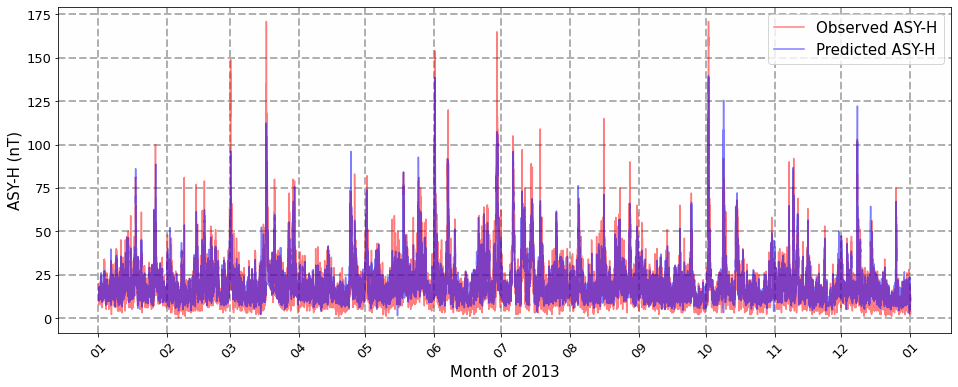

t+120


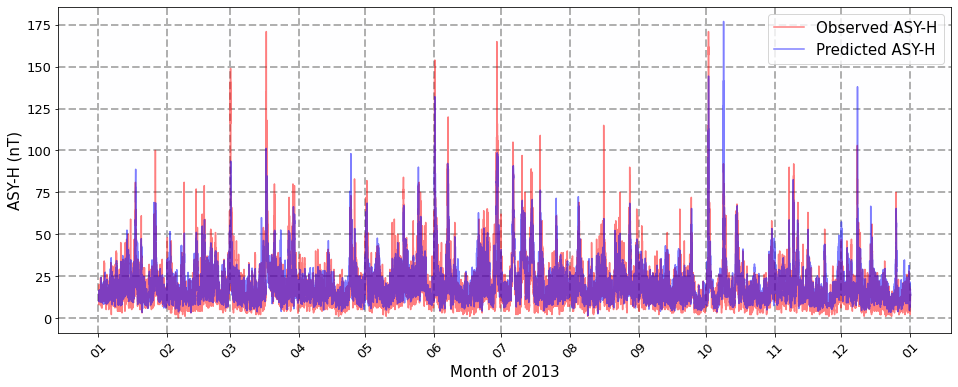

Testing year 2014, 2014-01-01 00:00:00, 2014-12-31 23:55:00
t+60


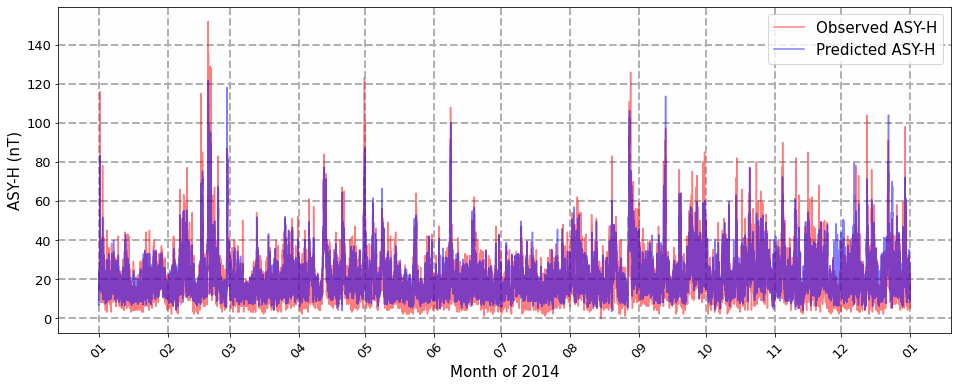

t+120


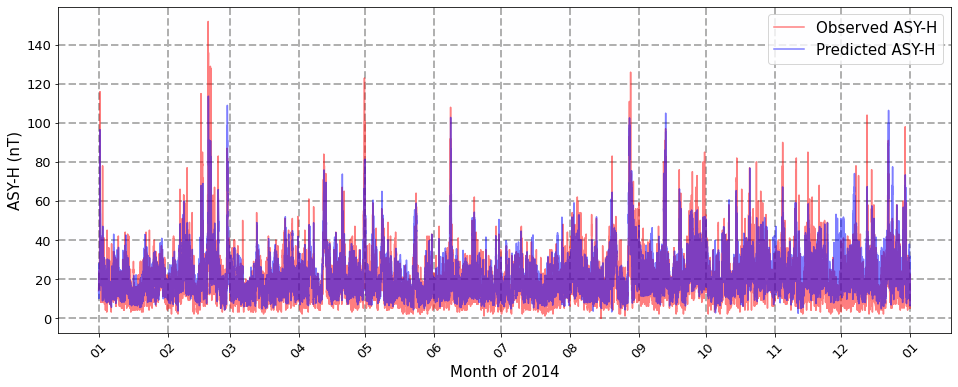

Testing year 2015, 2015-01-01 00:00:00, 2015-12-31 23:55:00
t+60


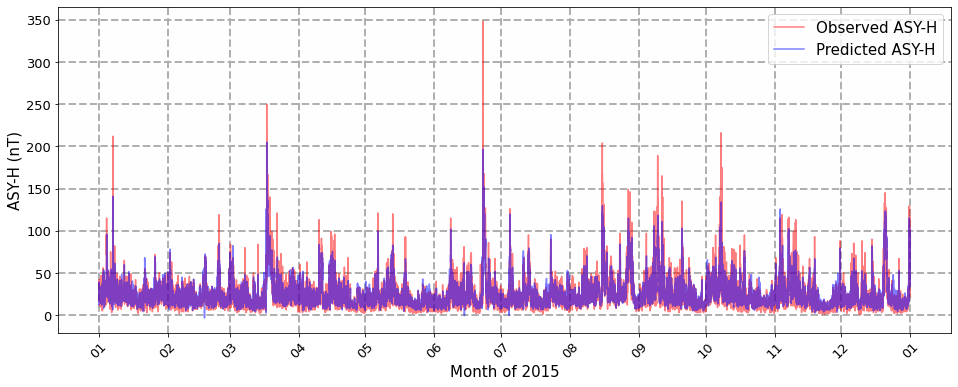

t+120


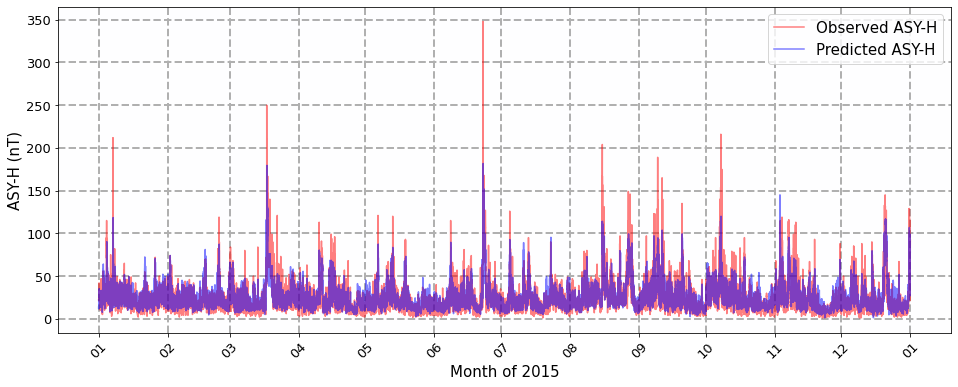

Testing year 2016, 2016-01-01 00:00:00, 2016-12-31 23:55:00
t+60


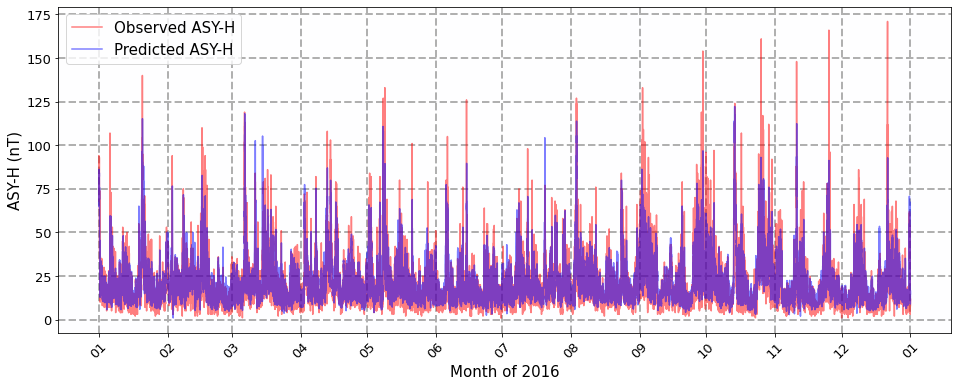

t+120


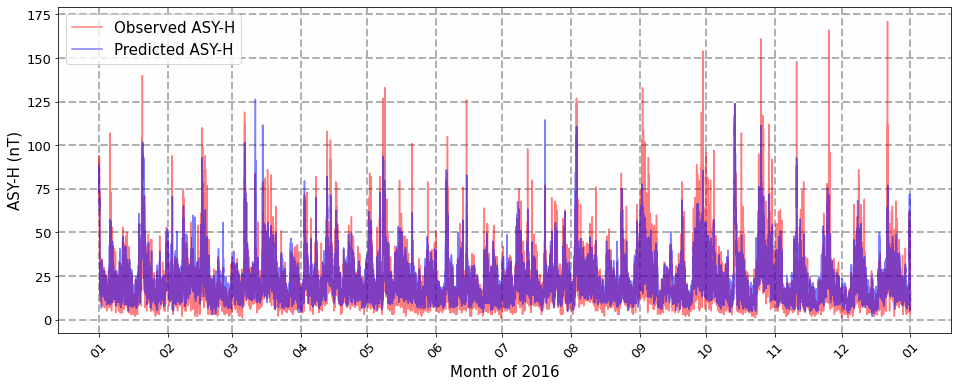

Testing year 2017, 2017-01-01 00:00:00, 2017-12-31 23:55:00
t+60


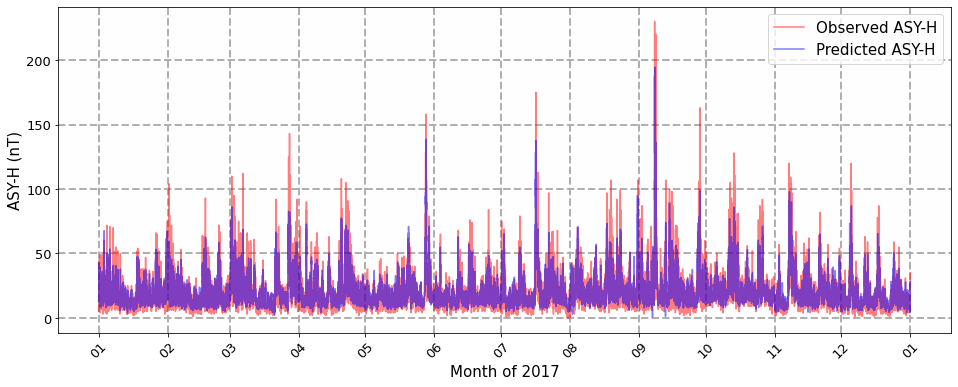

t+120


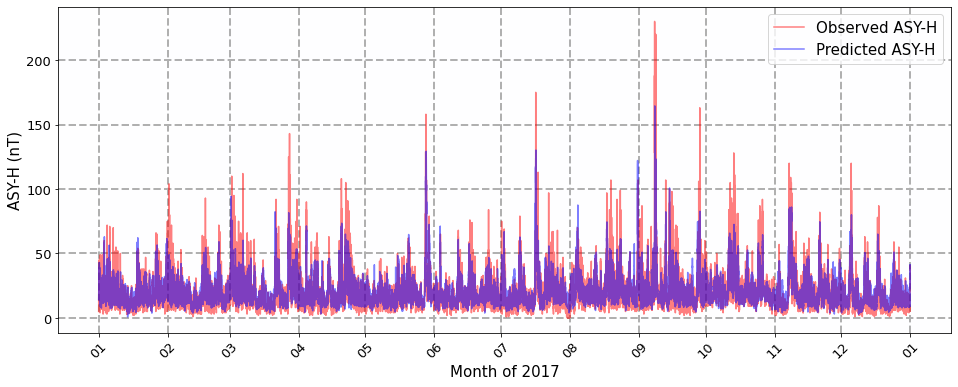

Testing year 2018, 2018-01-01 00:00:00, 2018-12-31 23:55:00
t+60


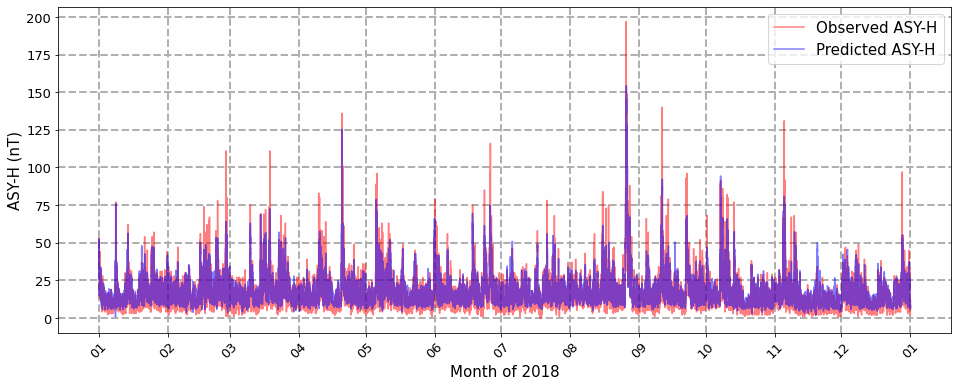

t+120


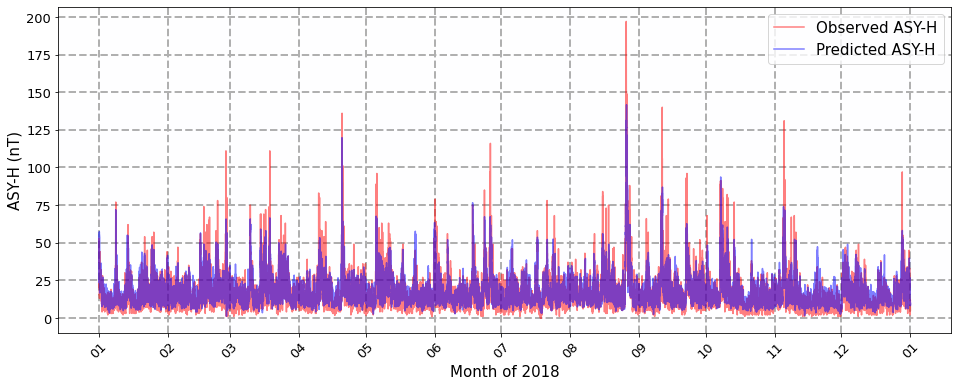

Testing year 2019, 2019-01-01 00:00:00, 2019-12-31 23:55:00
t+60


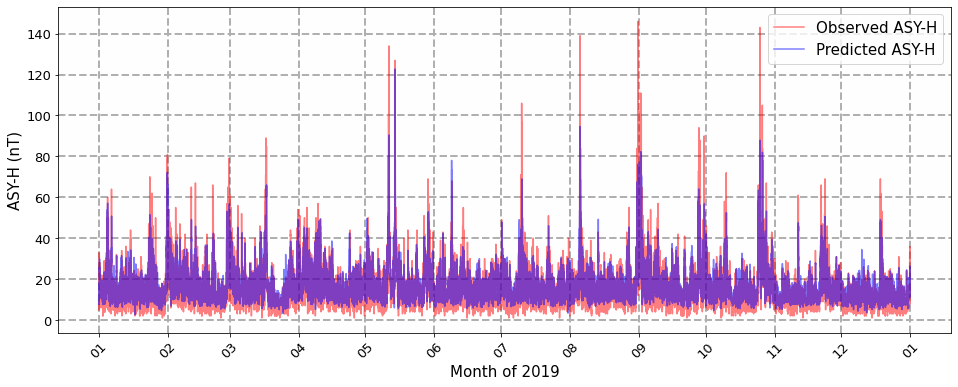

t+120


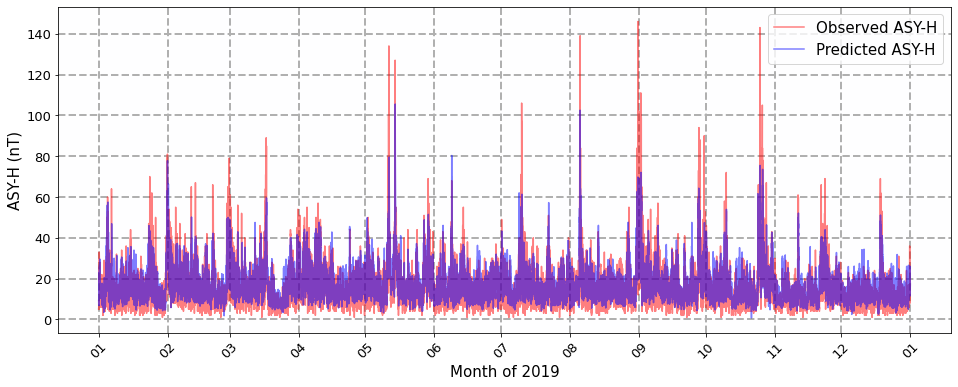

Testing year 2020, 2020-01-01 00:00:00, 2020-12-31 23:55:00
t+60


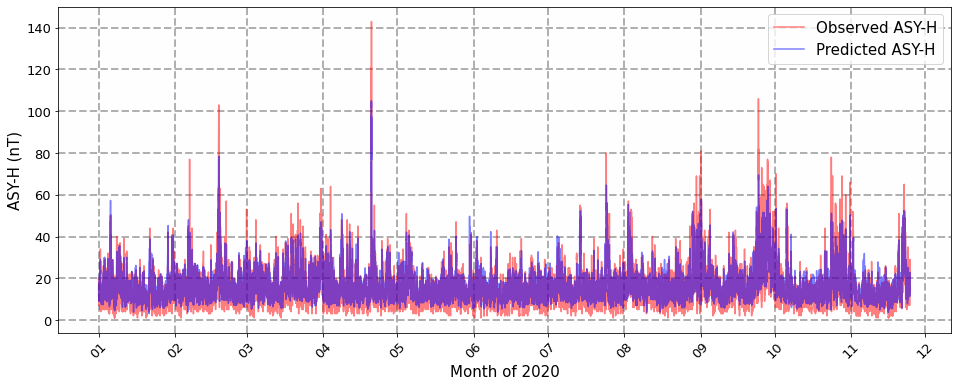

t+120


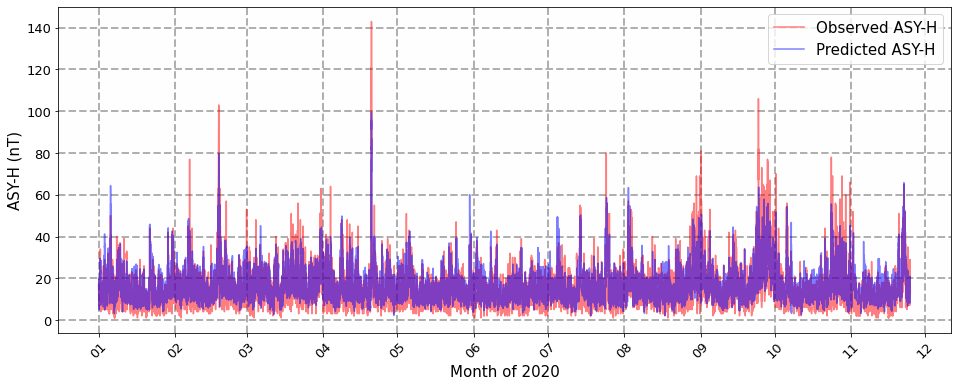

Year  Baseline RMSE t60  ...  Baseline R2 t120  Network R2 t120
0   2013              8.310  ...             0.287            0.477
1   2014              8.264  ...             0.119            0.292
2   2015             11.639  ...             0.363            0.541
3   2016             10.604  ...             0.153            0.394
4   2017             10.648  ...             0.115            0.415
5   2018              7.990  ...             0.177            0.419
6   2019              7.532  ...             0.088            0.327
7   2020              6.579  ...             0.058            0.250
8  Mean:              8.946  ...             0.170            0.389

[9 rows x 9 columns]

In [21]:
start_year = 2013
end_year = 2020

resumen_df = pd.DataFrame(
    columns=["Year"]
)

for i_year in range(end_year - start_year + 1):
    yy = i_year + start_year

    start_date = pd.to_datetime(
        str(start_year + i_year) + "0101", format="%Y%m%d", errors="ignore"
    )
    end_date = pd.to_datetime(
        str(start_year + i_year) + "12312355", format="%Y%m%d%H%M", errors="ignore"
    )

    
    print(
        f"Testing year {yy}, {start_date}, {end_date}"
    )    

    out = df_quiet_asy[start_date : end_date].copy()
    out_60 = df_quiet_asy_60[start_date : end_date].copy()
    out_120 = df_quiet_asy_120[start_date : end_date].copy()

    rmse_60 = msem(
        out[start_date:end_date].iloc[:-12]["og_ASY-H_t+60"],
        out[start_date:end_date].iloc[:-12]["pred_ASY-H_t+60"],
        squared=False,
    )
    r2_60 = r2m(
        out[start_date:end_date].iloc[:-12]["og_ASY-H_t+60"],
        out[start_date:end_date].iloc[:-12]["pred_ASY-H_t+60"],
    )

    rmse_120 = msem(
        out[start_date:end_date].iloc[:-24]["og_ASY-H_t+120"],
        out[start_date:end_date].iloc[:-24]["pred_ASY-H_t+120"],
        squared=False,
    )
    r2_120 = r2m(
        out[start_date:end_date].iloc[:-24]["og_ASY-H_t+120"],
        out[start_date:end_date].iloc[:-24]["pred_ASY-H_t+120"],
    )

    rmse_base_60 = msem(
        out[start_date:end_date].iloc[:-12]["og_ASY-H_t+60"],
        out[start_date:end_date].iloc[:-12]["og_ASY-H_t0"],
        squared=False,
    )
    r2_base_60 = r2m(
        out[start_date:end_date].iloc[:-12]["og_ASY-H_t+60"],
        out[start_date:end_date].iloc[:-12]["og_ASY-H_t0"],
    )

    rmse_base_120 = msem(
        out[start_date:end_date].iloc[:-24]["og_ASY-H_t+120"],
        out[start_date:end_date].iloc[:-24]["og_ASY-H_t0"],
        squared=False,
    )
    r2_base_120 = r2m(
        out[start_date:end_date].iloc[:-24]["og_ASY-H_t+120"],
        out[start_date:end_date].iloc[:-24]["og_ASY-H_t0"],
    )
    print('t+60')

    fig, axs = plt.subplots(figsize=(16,6))
    #fig.suptitle('desde {} hasta {} ASY-H index'.format(start_date, end_date), fontsize=120)

    axs.plot(out_60[start_date:end_date].index, out_60[start_date:end_date]['og_ASY-H_t+60'], color='red', alpha=0.5)
    axs.plot(out_60[start_date:end_date].index, out_60[start_date:end_date]['pred_ASY-H_t+60'], color='blue', alpha=0.5)
    #axs.set_title('desde {} hasta {} ASY-H index'.format(start_date, end_date) + '\npredictions in blue real in red\nmse: ' + str(mse_asy.round(decimals=3)) + '\nmae:  ' + str(mae_asy.round(decimals=3)) + '\ncorr:  ' + str(corr_asy.round(decimals=3)), fontsize= 8)
    xlab = 'Month of ' + str(yy)
    axs.set(xlabel = xlab, ylabel='ASY-H (nT)')



    axs.xaxis.set_major_locator(mdates.MonthLocator())
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
    for tick in axs.xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in axs.yaxis.get_major_ticks():
        tick.label.set_fontsize(13) 
    axs.yaxis.label.set_size(15)
    axs.xaxis.label.set_size(15)
    axs.grid(True, linestyle='--', linewidth=2)
    axs.legend(['Observed ASY-H', 'Predicted ASY-H'], fontsize = 15)

    plt.xticks(rotation=45)

    if (SAVE_FIGS):
        plt.savefig(f'./plots_out/ASY_quiet_year_{yy}_t60.png');


    plt.show();
    print('t+120')

    fig, axs = plt.subplots(figsize=(16,6))
    #fig.suptitle('desde {} hasta {} ASY-H index'.format(start_date, end_date), fontsize=120)

    axs.plot(out_120[start_date:end_date].index, out_120[start_date:end_date]['og_ASY-H_t+120'], color='red', alpha=0.5)
    axs.plot(out_120[start_date:end_date].index, out_120[start_date:end_date]['pred_ASY-H_t+120'], color='blue', alpha=0.5)
    #axs.set_title('desde {} hasta {} ASY-H index'.format(start_date, end_date) + '\npredictions in blue real in red\nmse: ' + str(mse_asy.round(decimals=3)) + '\nmae:  ' + str(mae_asy.round(decimals=3)) + '\ncorr:  ' + str(corr_asy.round(decimals=3)), fontsize= 8)
    xlab = 'Month of ' + str(yy)
    axs.set(xlabel = xlab, ylabel='ASY-H (nT)')



    axs.xaxis.set_major_locator(mdates.MonthLocator())
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
    for tick in axs.xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in axs.yaxis.get_major_ticks():
        tick.label.set_fontsize(13) 
    axs.yaxis.label.set_size(15)
    axs.xaxis.label.set_size(15)
    axs.grid(True, linestyle='--', linewidth=2)
    axs.legend(['Observed ASY-H', 'Predicted ASY-H'], fontsize = 15)

    plt.xticks(rotation=45)

    if (SAVE_FIGS):
        plt.savefig(f'./plots_out/ASY_quiet_year_{yy}_t120.png');


    plt.show();

    resumen_df = resumen_df.append(
        {
            "Year": str(yy),
            "Network RMSE t60": rmse_60,
            "Network R2 t60": r2_60,
            "Baseline RMSE t60": rmse_base_60,
            "Baseline R2 t60": r2_base_60,
            "Network RMSE t120": rmse_120,
            "Network R2 t120": r2_120,            
            "Baseline RMSE t120": rmse_base_120,
            "Baseline R2 t120": r2_base_120,
        },
        ignore_index=True,
    )

resumen_df = resumen_df.append(
    {
        "Year": "Mean:",        
        "Network RMSE t60": np.mean(resumen_df["Network RMSE t60"]),
        "Network R2 t60": np.mean(resumen_df["Network R2 t60"]),
        "Baseline RMSE t60": np.mean(resumen_df["Baseline RMSE t60"]),
        "Baseline R2 t60": np.mean(resumen_df["Baseline R2 t60"]),
        "Network RMSE t120": np.mean(resumen_df["Network RMSE t120"]),
        "Network R2 t120": np.mean(resumen_df["Network R2 t120"]),
        "Baseline RMSE t120": np.mean(resumen_df["Baseline RMSE t120"]),
        "Baseline R2 t120": np.mean(resumen_df["Baseline R2 t120"]),
    },
    ignore_index=True,
)

resumen_df = resumen_df[['Year', 'Baseline RMSE t60', 'Network RMSE t60', 'Baseline R2 t60','Network R2 t60', 'Baseline RMSE t120', 'Network RMSE t120', 'Baseline R2 t120', 'Network R2 t120']]
display(resumen_df)

In [22]:
print(resumen_df.to_latex(index=False))  


\begin{tabular}{lrrrrrrrr}
\toprule
  Year &  Baseline RMSE t60 &  Network RMSE t60 &  Baseline R2 t60 &  Network R2 t60 &  Baseline RMSE t120 &  Network RMSE t120 &  Baseline R2 t120 &  Network R2 t120 \\
\midrule
  2013 &              8.310 &             7.988 &            0.582 &           0.614 &              10.857 &              9.301 &             0.287 &            0.477 \\
  2014 &              8.264 &             8.321 &            0.498 &           0.492 &              10.952 &              9.819 &             0.119 &            0.292 \\
  2015 &             11.639 &            10.831 &            0.607 &           0.660 &              14.821 &             12.581 &             0.363 &            0.541 \\
  2016 &             10.604 &             9.758 &            0.447 &           0.531 &              13.110 &             11.090 &             0.153 &            0.394 \\
  2017 &             10.648 &             9.454 &            0.430 &           0.551 &              13.26

In [23]:
STORM_NAMES = [
    'June 1998',
    'November 1998',
    'January 1999',
    'April 1999',
    'January 2000',
    'April 2000',
    'May 2000',               
    'March 2001',
    'May 2003',
    'July 2003',
    'January 2004',
    'November 2004',
    'September 2012',
    'May 2013',
    'June 2013',
    'March 2015',
    'August 2018',
]

In [24]:
for storm_enum_index, storm_index in enumerate(range(26, 43)):

    print('\n\\begin{{figure}}'\
    '\n\\centering'\
    '\n\subfloat[][SYM-H 1 hour prediction]'\
    '\n{{\includegraphics[trim=80 10 99 50,clip,width=0.49\\textwidth]{{img/SYM_storm_{index_storm}_t60.png}}}}'\
    '\n\label{{fig:sym_60_{index_storm}}}'\
    '\n\hfill'\
    '\n\subfloat[][ASY-H 1 hour prediction]'\
    '\n{{\includegraphics[trim=80 10 99 50,clip,width=0.49\\textwidth]{{img/ASY_storm_{index_storm}_t60.png}}}}'\
    '\n\label{{fig:asy_60_{index_storm}}}'\
    '\n\\vspace{{12pt}}'\
    '\n\subfloat[][SYM-H 2 hours prediction]'\
    '\n{{\includegraphics[trim=80 10 99 50,clip,width=0.49\\textwidth]{{img/SYM_storm_{index_storm}_t120.png}}}}'\
    '\n\label{{fig:sym_120_{index_storm}}}'\
    '\n\hfill'\
    '\n\subfloat[][ASY-H 2 hours prediction]'\
    '\n{{\includegraphics[trim=80 10 99 50,clip,width=0.49\\textwidth]{{img/ASY_storm_{index_storm}_t120.png}}}}'\
    '\n\label{{fig:asy_120_{index_storm}}}'\
    '\n\caption{{Predictions for storm of {storm_name}}}'\
    '\n\label{{fig:storm{index_storm}}}'\
    '\n\end{{figure}}'.format(index_storm = storm_index, storm_name = STORM_NAMES[storm_enum_index]))

    print('\n\n')


\begin{figure}
\centering
\subfloat[][SYM-H 1 hour prediction]
{\includegraphics[trim=80 10 99 50,clip,width=0.49\textwidth]{img/SYM_storm_26_t60.png}}
\label{fig:sym_60_26}
\hfill
\subfloat[][ASY-H 1 hour prediction]
{\includegraphics[trim=80 10 99 50,clip,width=0.49\textwidth]{img/ASY_storm_26_t60.png}}
\label{fig:asy_60_26}
\vspace{12pt}
\subfloat[][SYM-H 2 hours prediction]
{\includegraphics[trim=80 10 99 50,clip,width=0.49\textwidth]{img/SYM_storm_26_t120.png}}
\label{fig:sym_120_26}
\hfill
\subfloat[][ASY-H 2 hours prediction]
{\includegraphics[trim=80 10 99 50,clip,width=0.49\textwidth]{img/ASY_storm_26_t120.png}}
\label{fig:asy_120_26}
\caption{Predictions for storm of June 1998}
\label{fig:storm26}
\end{figure}




\begin{figure}
\centering
\subfloat[][SYM-H 1 hour prediction]
{\includegraphics[trim=80 10 99 50,clip,width=0.49\textwidth]{img/SYM_storm_27_t60.png}}
\label{fig:sym_60_27}
\hfill
\subfloat[][ASY-H 1 hour prediction]
{\includegraphics[trim=80 10 99 50,clip,width=0

In [25]:
!tar -zcvf p.tar.gz plots_out/

plots_out/
plots_out/ASY_storm_40_t60.png
plots_out/ASY_storm_42_t60.png
plots_out/SYM_storm_37_t120.png
plots_out/SYM_storm_38_t120.png
plots_out/SYM_quiet_year_2013_t60.png
plots_out/ASY_storm_40_t120.png
plots_out/SYM_storm_30_t60.png
plots_out/SYM_quiet_year_2016_t60.png
plots_out/ASY_storm_35_t120.png
plots_out/SYM_storm_42_t60.png
plots_out/ASY_storm_41_t120.png
plots_out/SYM_storm_28_t120.png
plots_out/ASY_storm_33_t60.png
plots_out/SYM_storm_33_t120.png
plots_out/ASY_storm_36_t60.png
plots_out/ASY_quiet_year_2019_t60.png
plots_out/ASY_storm_38_t120.png
plots_out/ASY_storm_26_t60.png
plots_out/ASY_storm_28_t120.png
plots_out/ASY_storm_37_t120.png
plots_out/ASY_storm_27_t120.png
plots_out/SYM_storm_36_t60.png
plots_out/ASY_quiet_year_2015_t120.png
plots_out/SYM_storm_31_t120.png
plots_out/SYM_quiet_year_2020_t120.png
plots_out/SYM_quiet_year_2016_t120.png
plots_out/SYM_quiet_year_2019_t60.png
plots_out/SYM_quiet_year_2013_t120.png
plots_out/SYM_quiet_year_2015_t120.png
plots_out/